In [1]:
import pandas as pd
import numpy as np
import glob
import re
import seaborn as sns 
import matplotlib.pyplot as plt

## General visualizations of Eye tracker data health

In [2]:
data_frame = pd.read_csv("/Volumes/TwoTeras/1_Experiment_2/Eye_Tracking/Pre_processed/Data_Sets/Complete_Data_AngularV.cvs")

In [3]:
my_categories = {'Global_Landmark': '#e2514a', 
                 'TaskBuilding_Public': '#fca55d',
                'TaskBuilding_Residential': '#fee999',
                'Active_Agent': '#a2d9a4',
                'Passive_Agent': '#47a0b3'}

In [1]:
data_frame.head(50)

NameError: name 'data_frame' is not defined

In [5]:
# Just if I wanted to keep only complete cases 
#Mask_IDs = data_frame['SubjectID'].isin([479, 2361, 3246, 3572, 3976, 5238, 5531, 7264, 8695])
#data_frame_final = data_frame.loc[~Mask_IDs]

In [6]:
data_frame.combinedGazeValidityBitmask.value_counts(normalize=True)

combinedGazeValidityBitmask
3    0.945581
0    0.054419
Name: proportion, dtype: float64

In [7]:
 pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [8]:
data_frame.columns

Index(['Unnamed: 0', 'level_0', 'index', 'SubjectID', 'Session',
       'SessionSubsection', 'timeStampDataPointEnd',
       'combinedGazeValidityBitmask', 'eyePositionCombinedWorld.x',
       'eyePositionCombinedWorld.y', 'eyePositionCombinedWorld.z',
       'eyeDirectionCombinedWorld.y', 'eyeDirectionCombinedWorld.z',
       'eyeDirectionCombinedLocal.x', 'eyeDirectionCombinedLocal.y',
       'eyeDirectionCombinedLocal.z', 'playerBodyPosition.x',
       'playerBodyPosition.y', 'playerBodyPosition.z', 'hitColliderType',
       'hitObjectColliderName', 'ordinalOfHit', 'hitPointOnObject_x',
       'hitPointOnObject_y', 'hitPointOnObject_z', 'Eucledian_distance',
       'Collider_Categorical', 'Face_Hits', 'Time_Shift', 'Continuous_Time',
       'Bitmask_flag', 'Interpolated_collider', ' eyePositionCombinedWorld.x',
       'Collider_shift', 'counter', 'Time_of_Gaze', 'Gaze', 'combined_vel',
       'thresh', 'isFix', 'corrected_vel', 'events', 'length', 'distance',
       'avg_dist', 'nam

In [9]:
data_frame["Time_Shift"].describe()

count   16469051.000
mean           0.016
std            0.010
min            0.001
25%            0.011
50%            0.013
75%            0.022
max            0.994
Name: Time_Shift, dtype: float64

In [10]:
Blinks = pd.DataFrame(data_frame.groupby(["SubjectID", "Session"])["combinedGazeValidityBitmask"].value_counts(normalize=True))
Blinks.reset_index(inplace=True)
Blinks.loc[:, 'Validity'] = Blinks['combinedGazeValidityBitmask'].replace( {3:"Valid", 0:"Invalid"})

In [11]:
Blinks.head()

SubjectID  Session  combinedGazeValidityBitmask  proportion Validity
0       1031        1                            3       0.972    Valid
1       1031        1                            0       0.028  Invalid
2       1031        2                            3       0.977    Valid
3       1031        2                            0       0.023  Invalid
4       1031        3                            3       0.970    Valid

/Users/tracysanchezpacheco/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


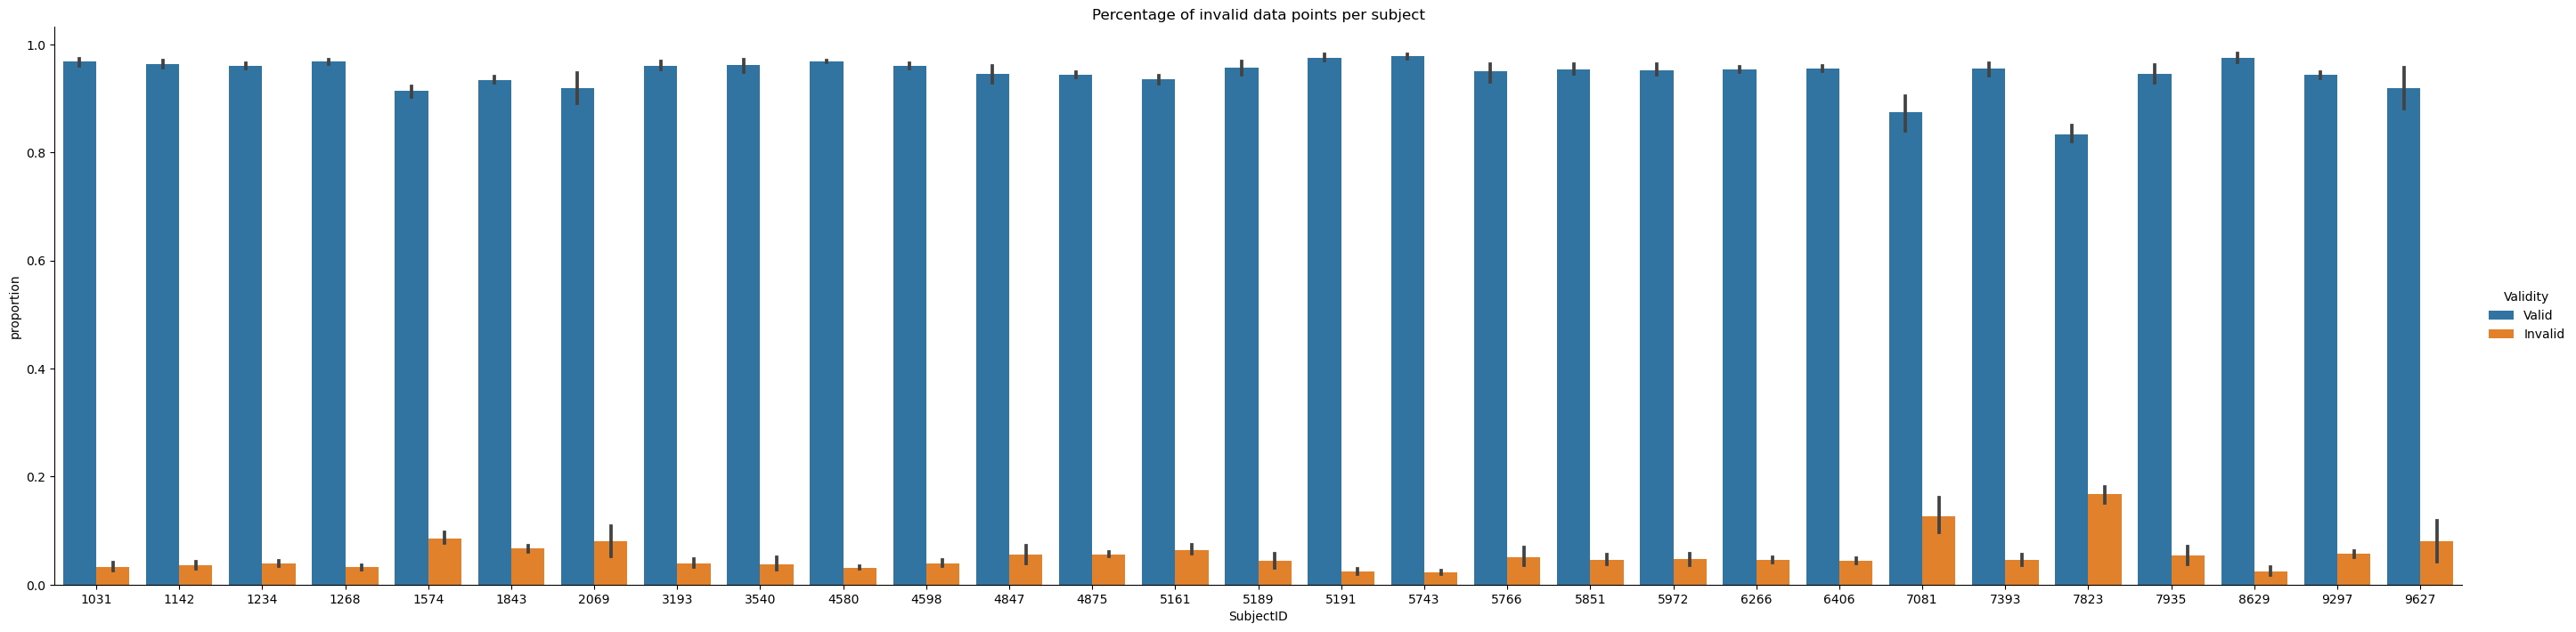

In [12]:
sns.catplot(data=Blinks, hue="Validity", y="proportion", x="SubjectID", kind="bar", \
            height=7, aspect=4).set(title="Percentage of invalid data points per subject")

In [13]:
data_frame.head()

Unnamed: 0  level_0  index  SubjectID  Session  SessionSubsection  \
0           0        0      0       1031        1                  1   
1           1        1      1       1031        1                  1   
2           2        2      2       1031        1                  1   
3           3        3      3       1031        1                  1   
4           4        4      4       1031        1                  1   

   timeStampDataPointEnd  combinedGazeValidityBitmask  \
0         1668436068.838                            3   
1         1668436068.847                            3   
2         1668436068.859                            3   
3         1668436068.880                            3   
4         1668436068.901                            3   

   eyePositionCombinedWorld.x  eyePositionCombinedWorld.y  ...  combined_vel  \
0                     -59.062                       2.409  ...           NaN   
1                     -59.062                       2.409  ...         0.000   
2                     -59.062                       2.409  ...         0.000   
3                     -59.003                       2.409  ...       144.818   
4                     -59.003                       2.409  ...         0.000   

   thresh  isFix  corrected_vel  events  length  distance  avg_dist  \
0  42.933    NaN            NaN     NaN     NaN       NaN       NaN   
1  42.933  0.000            NaN   2.000   0.011     6.394     6.394   
2  42.933  0.000            NaN  -2.000   0.011     6.394     6.394   
3  42.933    NaN        144.818  -1.000   0.021       NaN       NaN   
4  42.933  0.000          0.000   2.000   0.183     6.578     6.585   

            names Collider_CategoricalN  
0  pavement_O.002            Background  
1  pavement_O.002            Background  
2  pavement_O.002            Background  
3  pavement_O.002            Background  
4  pavement_O.002            Background  

[5 rows x 47 columns]

/var/folders/3p/lxg47mnx0ks_st66vkzkx1640000gn/T/ipykernel_14489/2271715428.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(data=plot, col="SubjectID", y="Continuous_Time", x="Session",  col_wrap=4, palette="flare")
/Users/tracysanchezpacheco/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


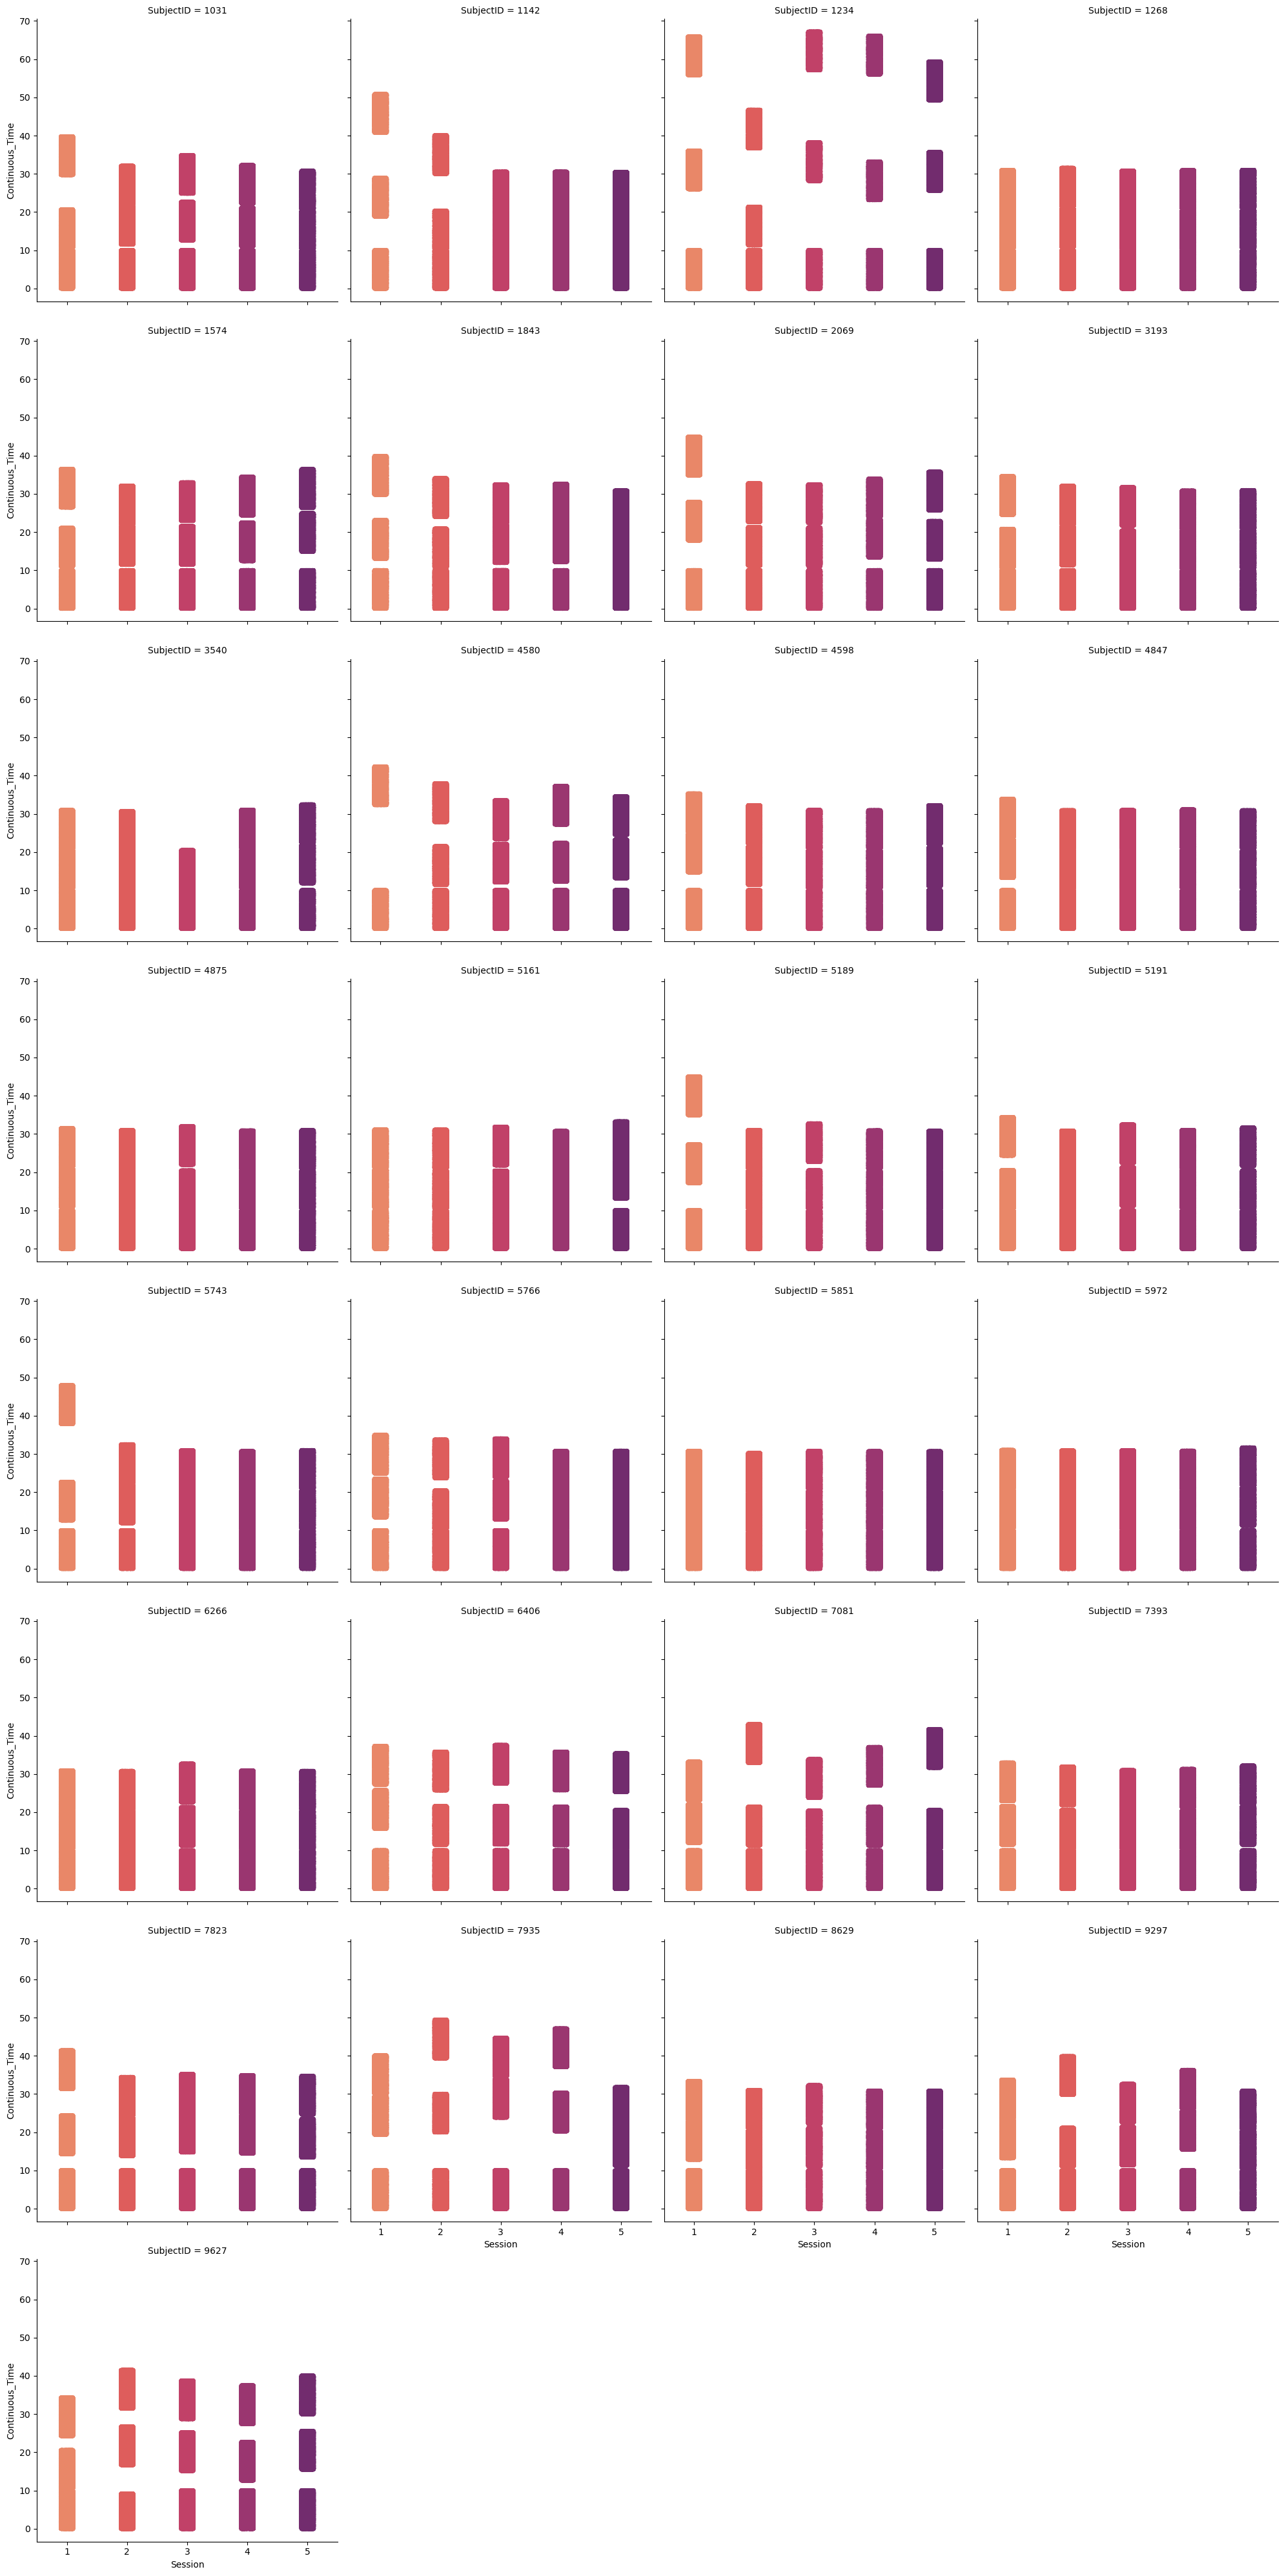

In [14]:
plot = data_frame[data_frame.Continuous_Time < 120]
sns.catplot(data=plot, col="SubjectID", y="Continuous_Time", x="Session",  col_wrap=4, palette="flare")

## Gaze processing

In [15]:
# Take  final row per fixation (the duration, average distance is the same all through the rows of the same fixation)
gaze = data_frame[data_frame.events == 2].copy()

### Get all gazes whose duration is more than 3.5 median standard deviations out 

In [16]:
gaze["Median_Standard_Duration"] = np.nanmedian(abs(gaze.length - np.nanmedian(gaze.length))) * 1.4826
gaze.loc[:, "gaze_mad_z"] = abs(gaze.length.tolist() - np.nanmedian(gaze.length)) / gaze.Median_Standard_Duration.tolist()
gaze.loc[:,"Outlier_Gaze_Length"] = np.where(gaze["gaze_mad_z"] > 3.5, "Out", "Stays")
gaze_no_out = gaze[gaze.Outlier_Gaze_Length != "Out"].copy()
gaze_no_out.to_csv("/Volumes/TwoTeras/1_Experiment_2/Eye_Tracking/Pre_processed/Data_Sets/Complete_Data_AngularV_NO_Outliers.cvs")

In [17]:
gaze.Outlier_Gaze_Length.value_counts(normalize=True)

Outlier_Gaze_Length
Stays   0.954
Out     0.046
Name: proportion, dtype: float64

In [18]:
# See how many data points we're loosing by excluding outliers 
display(gaze.shape)
display(gaze_no_out.shape)

(821946, 50)

(784084, 50)

### Gaze Visualizations on complete data 

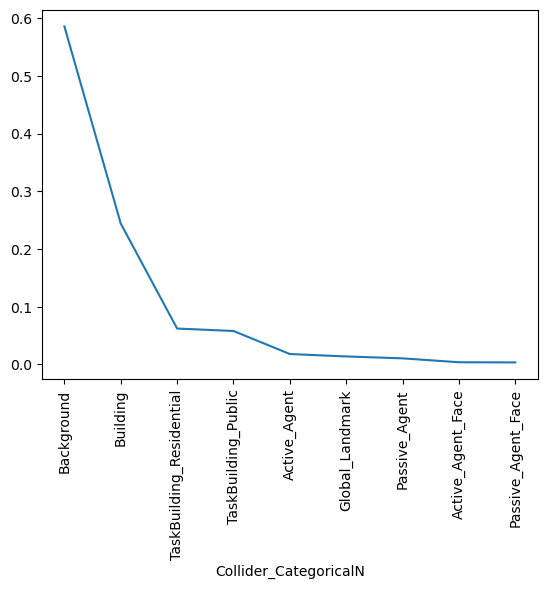

In [19]:
ax = gaze_no_out.Collider_CategoricalN.value_counts(normalize=True).plot()
ax.tick_params(axis='x', labelrotation = 90)

In [20]:
gaze_no_out.SubjectID.unique()

array([1031, 1268, 1574, 1843, 2069, 3193, 3540, 4580, 4598, 4847, 4875,
       5161, 5189, 5743, 5766, 5851, 5972, 6406, 7081, 7393, 7823, 7935,
       8629, 9297, 9627, 1142, 1234, 6266, 5191])

In [21]:
#General plotting settings
sns.set(rc={"figure.figsize":(20, 15)})
sns.set(font_scale = 1.3)
plt.tight_layout()

<Figure size 2000x1500 with 0 Axes>

/Users/tracysanchezpacheco/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tracysanchezpacheco/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


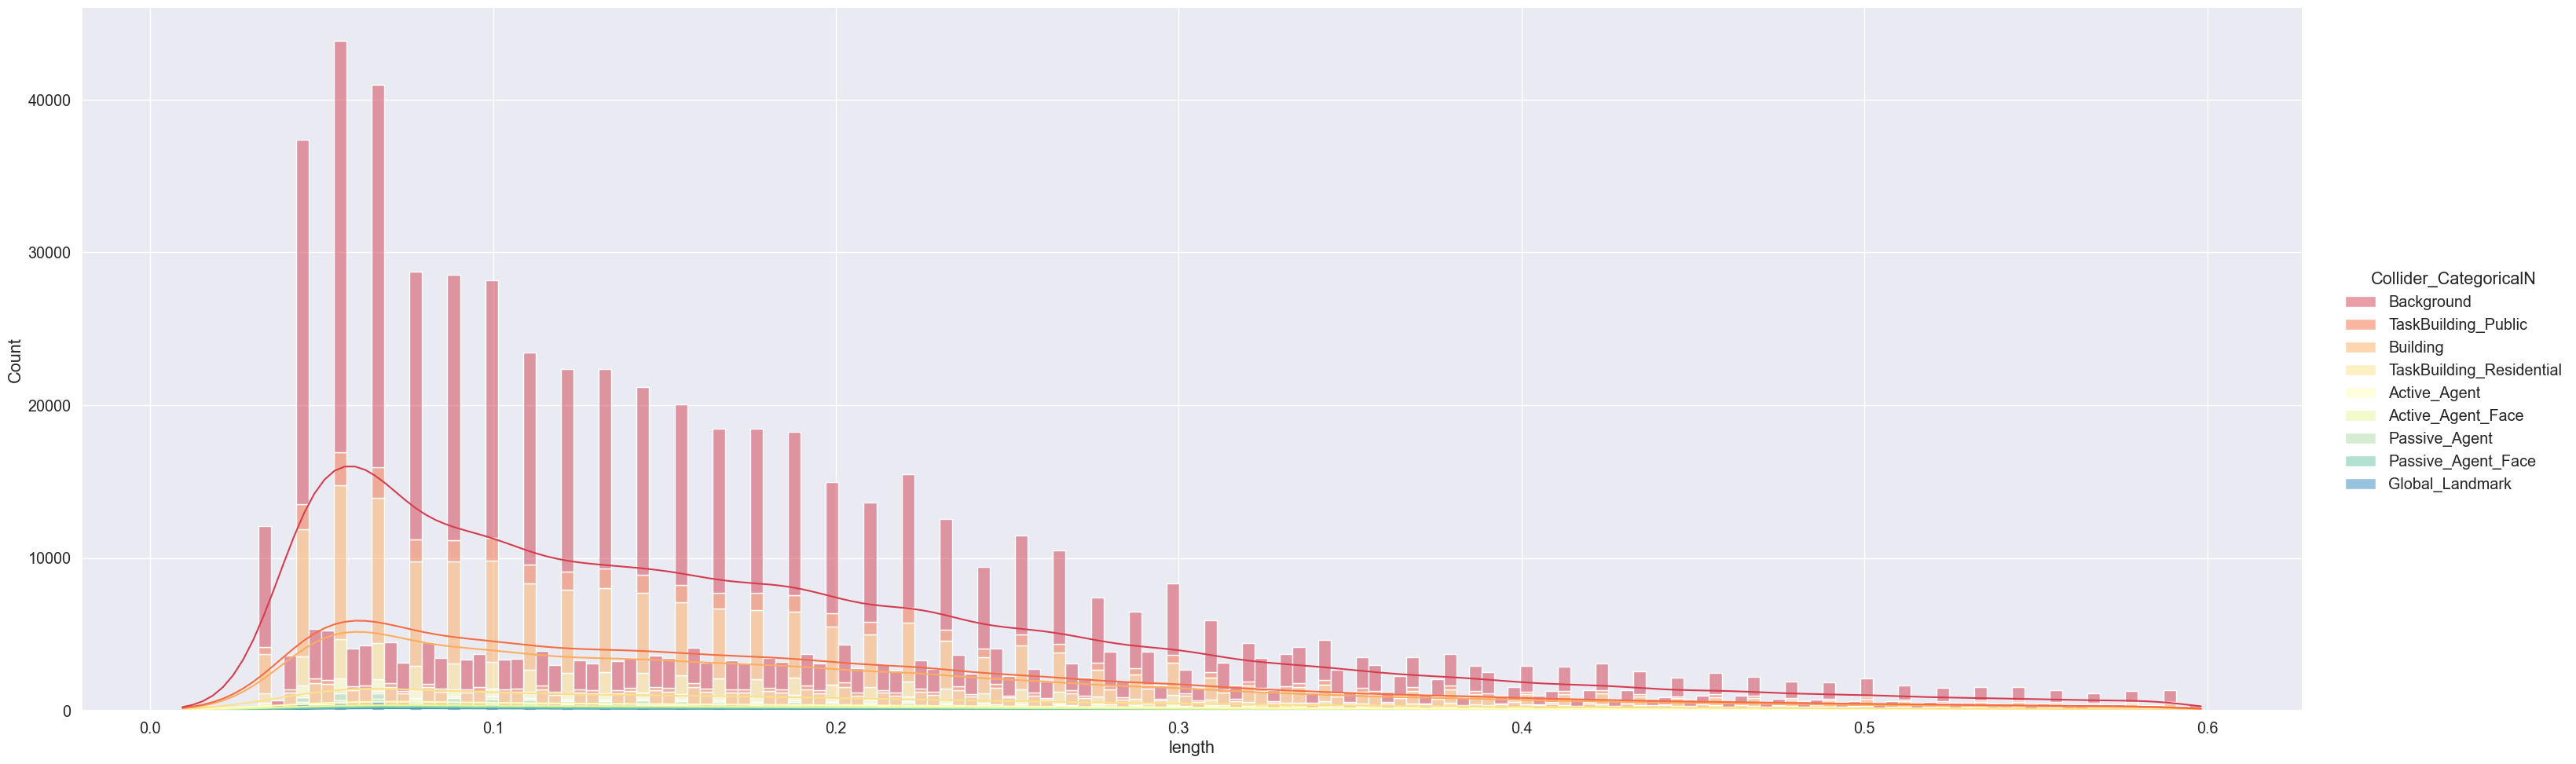

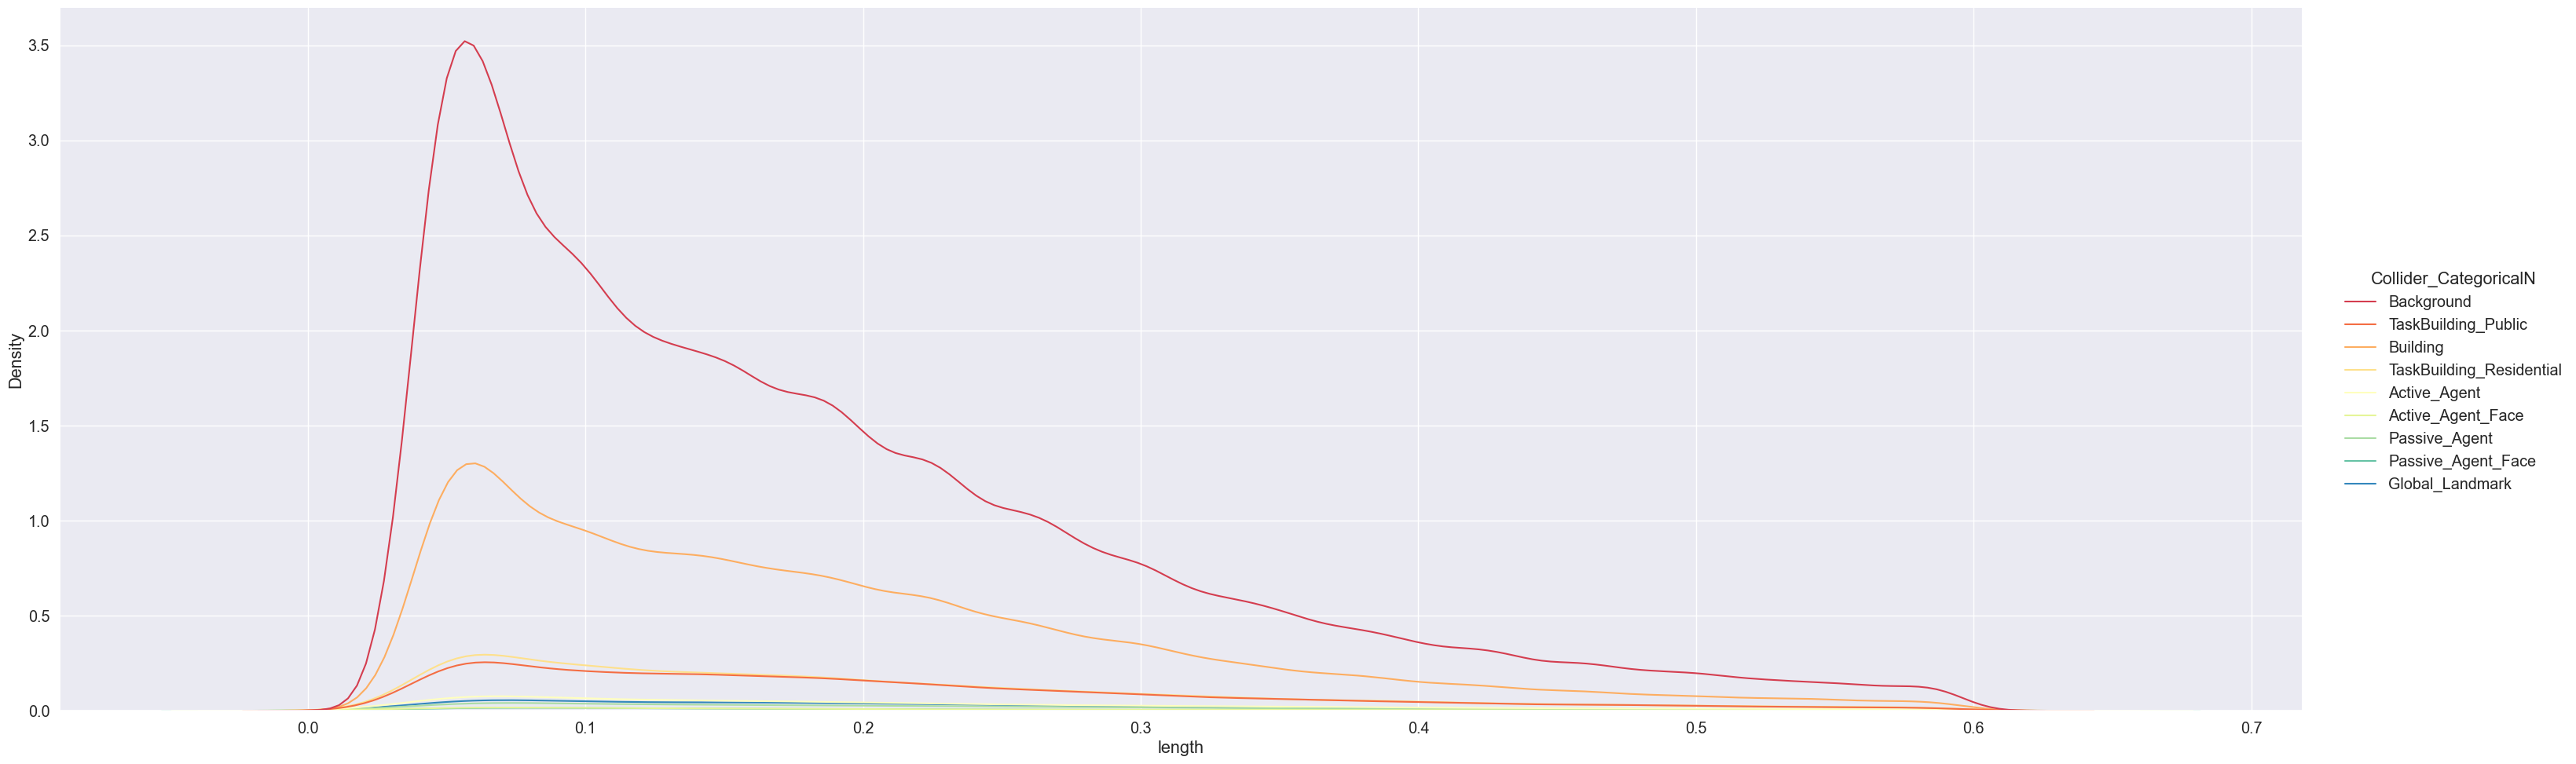

In [22]:
sns.displot(x='length', hue="Collider_CategoricalN",
             data=gaze_no_out, 
            height=10, aspect= 3, kde=True, palette="Spectral",  multiple="stack")

sns.displot(x='length', hue="Collider_CategoricalN",
             data=gaze_no_out, 
            height=10, aspect= 3, kind="kde", palette="Spectral")

In [23]:
# Since the collider names are too detailed, here we create a dictionary with patterns to classify them into our categories of interest
patterns = {'\d{2}_Sa':'Passive_Agent', '\d{2}_Cma':'Active_Agent', 'Building_\d+': 'Building'}
patterns.update(dict.fromkeys(['Castle-TaskBuilding_56', 'Crane_59','HighSilo-TaskBuilding_49', 'Windmill-TaskBuilding_10_1', 'Church-TaskBuilding_16'], 'Global_Landmark'))
patterns.update(dict.fromkeys(['^TaskBuilding_2$','^TaskBuilding_3$', '^TaskBuilding_5$', '^TaskBuilding_8$', '^TaskBuilding_9$', '^TaskBuilding_11$', '^TaskBuilding_13$', '^TaskBuilding_14$', '^TaskBuilding_20$', 
                               '^TaskBuilding_21$', '^TaskBuilding_23$','^TaskBuilding_27$', '^TaskBuilding_29$', '^TaskBuilding_32$', '^TaskBuilding_34$',  '^TaskBuilding_38$', '^TaskBuilding_41$', '^TaskBuilding_42$', 
                               '^TaskBuilding_44$', '^TaskBuilding_45$', '^TaskBuilding_47$', '^TaskBuilding_50$', '^TaskBuilding_51$', '^TaskBuilding_52$', 'BasketballCourt_58', 'Construction_57', 
                               '^Graffity_02$', '^Graffity_03$', '^Graffity_05$', '^Graffity_08$', '^Graffity_09$', '^Graffity_11$', '^Graffity_13$', '^Graffity_14$', '^Graffity_20$', 
                               '^Graffity_21$', '^Graffity_23$', '^Graffity_27$', '^Graffity_29$', '^Graffity_32$', '^Graffity_34$', '^Graffity_38$', '^Graffity_41$', '^Graffity_42$', 
                               '^Graffity_44$', '^Graffity_45$', '^Graffity_47$',  '^Graffity_50$', '^Graffity_51$', '^Graffity_52$'], 'TaskBuilding_Public'))

patterns.update(dict.fromkeys(['^TaskBuilding_1$','^TaskBuilding_4$', '^TaskBuilding_6$', '^TaskBuilding_7$', '^TaskBuilding_12$', '^TaskBuilding_15$', '^TaskBuilding_17$', '^TaskBuilding_18$', '^TaskBuilding_19$', 
                               '^TaskBuilding_22$', '^TaskBuilding_24$','^TaskBuilding_25$', '^TaskBuilding_26$', '^TaskBuilding_28$', '^TaskBuilding_30$',  '^TaskBuilding_31$', '^TaskBuilding_33$', '^TaskBuilding_35$', 
                               '^TaskBuilding_36$', '^TaskBuilding_37$', '^TaskBuilding_39$', '^TaskBuilding_40$', '^TaskBuilding_43$', '^TaskBuilding_48$', '^TaskBuilding_54$','^TaskBuilding_55$',
                               '^Graffity_01$','^Graffity_04$', '^Graffity_06$', '^Graffity_07$', '^Graffity_12$', '^Graffity_15$', '^Graffity_17$', '^Graffity_18$', '^Graffity_19$', '^Graffity_22$', 
                               '^Graffity_24$','^Graffity_25$', '^Graffity_26$', '^Graffity_28$', '^Graffity_30$',  '^Graffity_31$', '^Graffity_33$', '^Graffity_35$', '^Graffity_36$', '^Graffity_37$', '^Graffity_39$', 
                               '^Graffity_40$', '^Graffity_43$', '^Graffity_48$', '^Graffity_54$', '^Graffity_55$' ], 'TaskBuilding_Residential'))
default_val = 'Background'

In [24]:
gaze_no_out["Collider_CategoricalN"] =  gaze_no_out['names'].apply(lambda x: next((val for key, val in patterns.items() if re.match(key, x)), default_val))
#string_to_add = "_Face"
# Define the condition and the string to add
#Mask_1f = ((data_frame_gaze_no_out_ONLY_TEST['Collider_CategoricalN'] == "Active_Agent") & (data_frame_gaze_no_out_ONLY_TEST['Face_Hits'] == "Face")) | ((data_frame_gaze_no_out_ONLY_TEST['Collider_CategoricalN'] == "Passive_Agent") & (data_frame_gaze_no_out_ONLY_TEST['Face_Hits'] == "Face"))
#data_frame_gaze_no_out_ONLY_TEST.loc[Mask_1f, 'Collider_CategoricalN'] = data_frame_gaze_no_out_ONLY_TEST.loc[Mask_1f, 'Collider_CategoricalN'] + string_to_add

In [25]:
#Keep only the gazes that happened on the categories of interest
data_frame_gaze_no_out_ONLY_TEST = gaze_no_out[(gaze_no_out.Collider_CategoricalN != "Background") & (gaze_no_out.Collider_CategoricalN != "Building")].copy()
#One with all buildings
data_frame_gaze_no_out_Buildings = gaze_no_out[(gaze_no_out.Collider_CategoricalN != "Background")].copy()

In [26]:
data_frame_gaze_no_out_ONLY_TEST.Collider_CategoricalN.value_counts(normalize=True)

Collider_CategoricalN
TaskBuilding_Residential   0.365
TaskBuilding_Public        0.340
Active_Agent               0.129
Passive_Agent              0.084
Global_Landmark            0.082
Name: proportion, dtype: float64

In [27]:
data_frame_gaze_no_out_ONLY_TEST.head()

Unnamed: 0  level_0  index  SubjectID  Session  SessionSubsection  \
58           58       58     58       1031        1                  1   
214         214      214    214       1031        1                  1   
225         225      225    225       1031        1                  1   
232         232      232    232       1031        1                  1   
250         250      250    250       1031        1                  1   

     timeStampDataPointEnd  combinedGazeValidityBitmask  \
58          1668436069.815                            3   
214         1668436071.957                            3   
225         1668436072.180                            3   
232         1668436072.324                            3   
250         1668436072.679                            3   

     eyePositionCombinedWorld.x  eyePositionCombinedWorld.y  ...  \
58                      -59.007                       2.417  ...   
214                     -59.075                       2.436  ...   
225                     -59.099                       2.434  ...   
232                     -59.095                       2.431  ...   
250                     -59.072                       2.428  ...   

     corrected_vel  events  length  distance  avg_dist            names  \
58          15.565   2.000   0.171   130.954   130.974  TaskBuilding_27   
214         25.718   2.000   0.088     9.925     9.926  TaskBuilding_35   
225         21.310   2.000   0.078    12.306    12.321  TaskBuilding_35   
232          5.401   2.000   0.310     7.233     7.232           23_Cma   
250          1.913   2.000   0.311    12.383    12.375      Graffity_35   

        Collider_CategoricalN  Median_Standard_Duration  gaze_mad_z  \
58        TaskBuilding_Public                     0.126       0.103   
214  TaskBuilding_Residential                     0.126       0.556   
225  TaskBuilding_Residential                     0.126       0.639   
232              Active_Agent                     0.126       1.207   
250  TaskBuilding_Residential                     0.126       1.219   

    Outlier_Gaze_Length  
58                Stays  
214               Stays  
225               Stays  
232               Stays  
250               Stays  

[5 rows x 50 columns]

/Users/tracysanchezpacheco/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tracysanchezpacheco/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


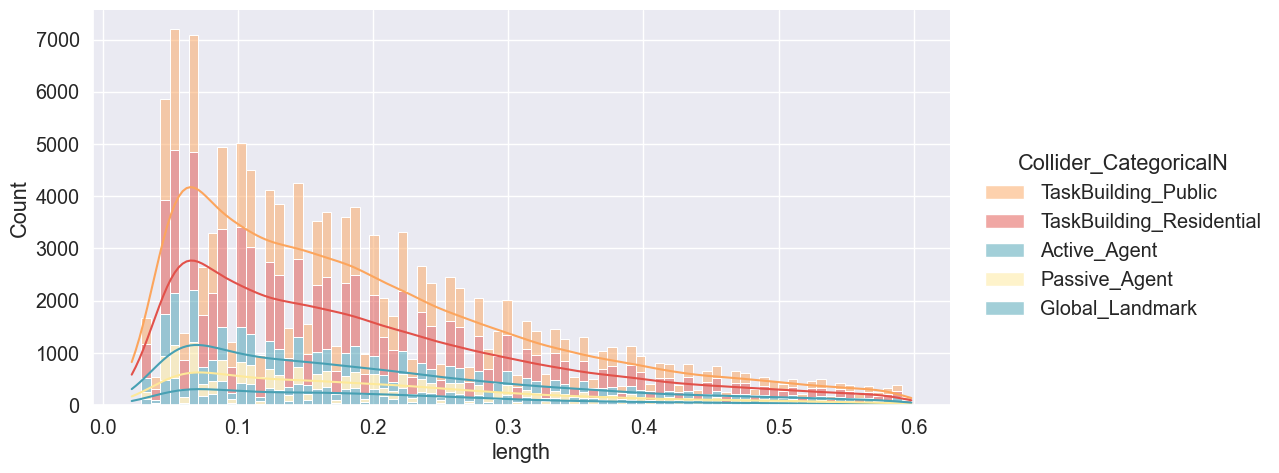

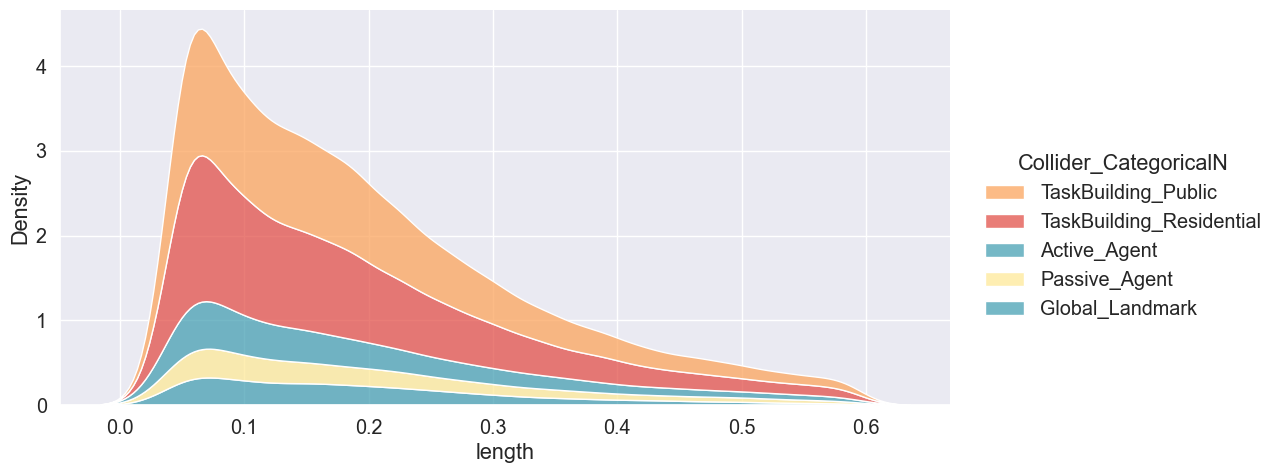

In [28]:
my_Categories = {'TaskBuilding_Residential': '#e2514a', 'Passive_Agent':'#fee999', 'TaskBuilding_Public': '#fca55d',
       'Global_Landmark':'#47a0b3', 'Active_Agent':'#47a0b3'}
sns.displot(x='length', hue="Collider_CategoricalN",
             data=data_frame_gaze_no_out_ONLY_TEST, 
            height=5, aspect= 2, kde=True, palette=my_Categories,  multiple="stack")

sns.displot(x='length', hue="Collider_CategoricalN",
             data=data_frame_gaze_no_out_ONLY_TEST, 
            height=5, aspect= 2, kind="kde", palette=my_Categories, multiple="stack")

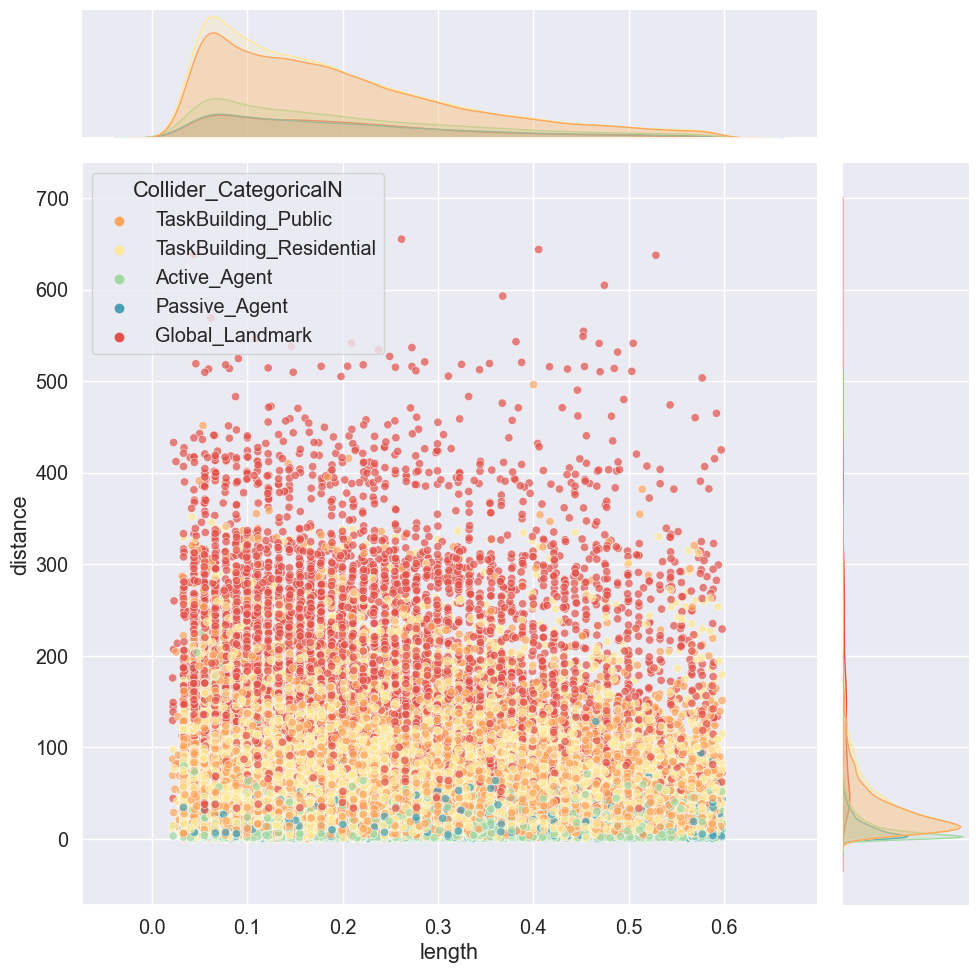

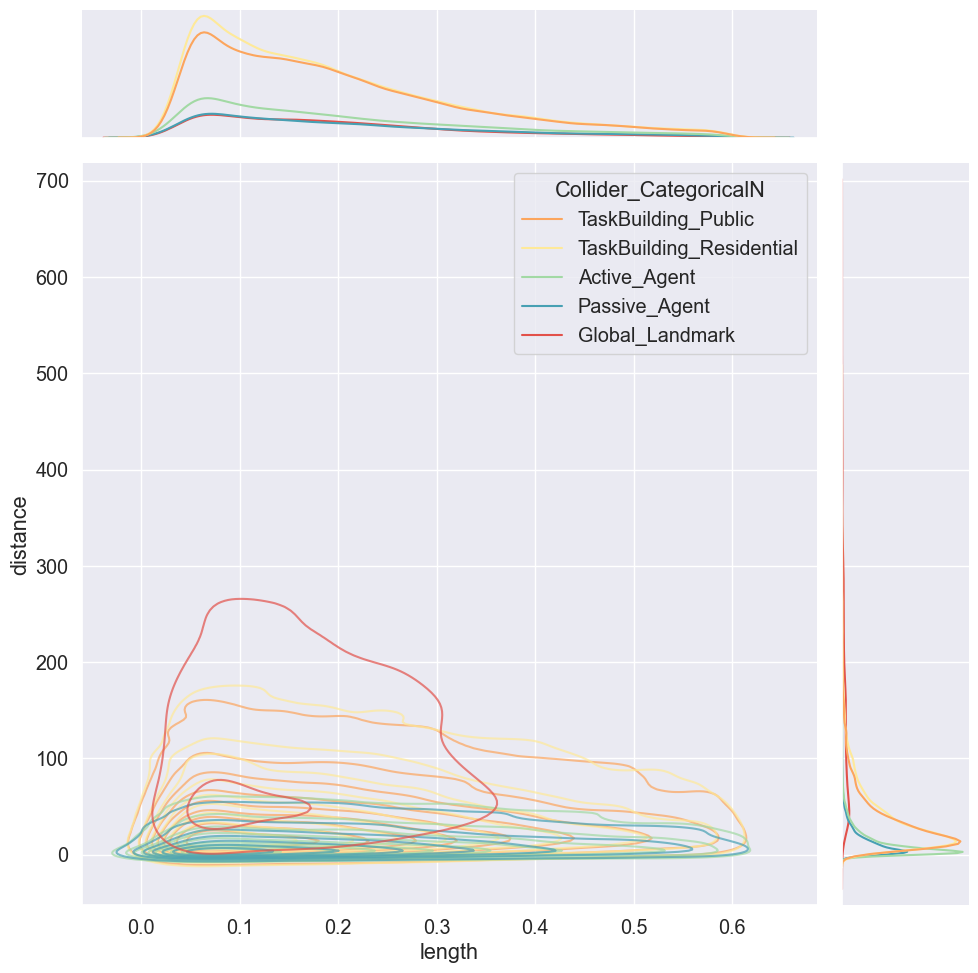

In [29]:
sns.jointplot(data=data_frame_gaze_no_out_ONLY_TEST, y="distance", x="length", hue="Collider_CategoricalN",  height=10, alpha=0.7, palette=my_categories)
sns.jointplot(data=data_frame_gaze_no_out_ONLY_TEST, y="distance", x="length", hue="Collider_CategoricalN",  height=10, alpha=0.7, palette=my_categories,  kind="kde")

In [30]:
# Create a Dictionary that identifies agent, graffity and house into this three categories
patterns2 = {'\d{2}_Sa':'Agent', '\d{2}_Cma':'Agent', '^TaskBuilding_': 'Building', 'BasketballCourt_58': 'Building', '^Graffity':'Graffity'}
patterns2.update(dict.fromkeys(['Castle-TaskBuilding_56', 'Crane_59','HighSilo-TaskBuilding_49', 'Windmill-TaskBuilding_10_1', 'Church-TaskBuilding_16'], 'Global_Landmark'))

In [31]:
data_frame_gaze_no_out_ONLY_TEST['Hit_Object_Category'] = data_frame_gaze_no_out_ONLY_TEST['names'].apply(lambda x: next((val for key, val in patterns2.items() if re.match(key, x)), default_val))
data_frame_gaze_no_out_Buildings['Hit_Object_Category'] = data_frame_gaze_no_out_Buildings['names'].apply(lambda x: next((val for key, val in patterns2.items() if re.match(key, x)), default_val))

In [32]:
data_frame_gaze_no_out_ONLY_TEST = data_frame_gaze_no_out_ONLY_TEST.loc[:, ~data_frame_gaze_no_out_ONLY_TEST.columns.str.contains('^Unnamed')]
data_frame_gaze_no_out_ONLY_TEST.head()

level_0  index  SubjectID  Session  SessionSubsection  \
58        58     58       1031        1                  1   
214      214    214       1031        1                  1   
225      225    225       1031        1                  1   
232      232    232       1031        1                  1   
250      250    250       1031        1                  1   

     timeStampDataPointEnd  combinedGazeValidityBitmask  \
58          1668436069.815                            3   
214         1668436071.957                            3   
225         1668436072.180                            3   
232         1668436072.324                            3   
250         1668436072.679                            3   

     eyePositionCombinedWorld.x  eyePositionCombinedWorld.y  \
58                      -59.007                       2.417   
214                     -59.075                       2.436   
225                     -59.099                       2.434   
232                     -59.095                       2.431   
250                     -59.072                       2.428   

     eyePositionCombinedWorld.z  ...  events  length  distance  avg_dist  \
58                       34.770  ...   2.000   0.171   130.954   130.974   
214                      34.759  ...   2.000   0.088     9.925     9.926   
225                      34.758  ...   2.000   0.078    12.306    12.321   
232                      34.759  ...   2.000   0.310     7.233     7.232   
250                      34.763  ...   2.000   0.311    12.383    12.375   

               names     Collider_CategoricalN  Median_Standard_Duration  \
58   TaskBuilding_27       TaskBuilding_Public                     0.126   
214  TaskBuilding_35  TaskBuilding_Residential                     0.126   
225  TaskBuilding_35  TaskBuilding_Residential                     0.126   
232           23_Cma              Active_Agent                     0.126   
250      Graffity_35  TaskBuilding_Residential                     0.126   

     gaze_mad_z Outlier_Gaze_Length Hit_Object_Category  
58        0.103               Stays            Building  
214       0.556               Stays            Building  
225       0.639               Stays            Building  
232       1.207               Stays               Agent  
250       1.219               Stays            Graffity  

[5 rows x 50 columns]

### Recode to count the graffity as the house hit 

In [33]:
# Map graffity into the name of the building that it's in front of 
Graffity_mapping = {'Graffity_14':'TaskBuilding_14', 
                  'Graffity_41': 'TaskBuilding_41',
                  'Graffity_02': 'TaskBuilding_2', 
                  'Graffity_47': 'TaskBuilding_47',
                  'Graffity_20': 'TaskBuilding_20',
                  'Graffity_09': 'TaskBuilding_9',
                  'Graffity_50': 'TaskBuilding_50',
                  'Graffity_45': 'TaskBuilding_45',
                  'Graffity_08': 'TaskBuilding_8',
                  'Graffity_27': 'TaskBuilding_27',
                  'Graffity_51': 'TaskBuilding_51',
                  'Graffity_03': 'TaskBuilding_3',
                  'Graffity_11': 'TaskBuilding_11',
                  'Graffity_42': 'TaskBuilding_42',
                  'Graffity_23': 'TaskBuilding_23',
                  'Graffity_52': 'TaskBuilding_52',
                  'Graffity_38': 'TaskBuilding_38',
                  'Graffity_34': 'TaskBuilding_34',
                  'Graffity_05': 'TaskBuilding_5',
                  'Graffity_29': 'TaskBuilding_29',
                  'Graffity_32': 'TaskBuilding_32',
                  'Graffity_13': 'TaskBuilding_13',
                  'Graffity_44': 'TaskBuilding_44',
                  'Graffity_21': 'TaskBuilding_21',
                  'Graffity_04': 'TaskBuilding_4',
                  'Graffity_01': 'TaskBuilding_1',
                  'Graffity_06': 'TaskBuilding_6',
                  'Graffity_07': 'TaskBuilding_7',  
                  'Graffity_17': 'TaskBuilding_17', 
                  'Graffity_15': 'TaskBuilding_15',
                  'Graffity_12': 'TaskBuilding_12',
                  'Graffity_18': 'TaskBuilding_18',
                  'Graffity_19': 'TaskBuilding_19',
                  'Graffity_22': 'TaskBuilding_22',
                  'Graffity_24': 'TaskBuilding_24',
                  'Graffity_25': 'TaskBuilding_25',
                  'Graffity_26': 'TaskBuilding_26',
                  'Graffity_28': 'TaskBuilding_28',
                  'Graffity_30': 'TaskBuilding_30',
                  'Graffity_31': 'TaskBuilding_31',
                  'Graffity_33': 'TaskBuilding_33',
                  'Graffity_35': 'TaskBuilding_35',
                  'Graffity_36': 'TaskBuilding_36',
                  'Graffity_37': 'TaskBuilding_37',
                  'Graffity_39': 'TaskBuilding_39',
                  'Graffity_40': 'TaskBuilding_40',
                  'Graffity_43': 'TaskBuilding_43',
                  'Graffity_48': 'TaskBuilding_48',
                  'Graffity_54': 'TaskBuilding_54',
                  'Graffity_55': 'TaskBuilding_55'
             }

In [34]:
# Here we recode the literal expression on dictionary Graffity_mapping
data_frame_gaze_no_out_ONLY_TEST.loc[:, 'recoded'] = data_frame_gaze_no_out_ONLY_TEST.loc[:,'names']
data_frame_gaze_no_out_ONLY_TEST['recoded'].replace(Graffity_mapping, inplace=True)
data_frame_gaze_no_out_Buildings.loc[:, 'recoded'] = data_frame_gaze_no_out_Buildings.loc[:,'names']
data_frame_gaze_no_out_Buildings['recoded'].replace(Graffity_mapping, inplace=True)

In [35]:
data_frame_gaze_no_out_ONLY_TEST["Collider_CategoricalN"] =  data_frame_gaze_no_out_ONLY_TEST['recoded'].apply(lambda x: next((val for key, val in patterns.items() if re.match(key, x)), default_val))
data_frame_gaze_no_out_Buildings["Collider_CategoricalN"] =  data_frame_gaze_no_out_Buildings['recoded'].apply(lambda x: next((val for key, val in patterns.items() if re.match(key, x)), default_val))

## Cummulative sum calculation

In [36]:
data_frame_gaze_no_out_ONLY_TEST["cumsum_length"] = data_frame_gaze_no_out_ONLY_TEST.groupby(["SubjectID", "recoded", "Collider_CategoricalN"])['length'].cumsum()
data_frame_gaze_no_out_Buildings["cumsum_length"] = data_frame_gaze_no_out_Buildings.groupby(["SubjectID", "recoded", "Collider_CategoricalN"])['length'].cumsum()

In [37]:
data_frame_gaze_no_out_ONLY_TEST.head(20)

level_0  index  SubjectID  Session  SessionSubsection  \
58         58     58       1031        1                  1   
214       214    214       1031        1                  1   
225       225    225       1031        1                  1   
232       232    232       1031        1                  1   
250       250    250       1031        1                  1   
309       309    309       1031        1                  1   
324       324    324       1031        1                  1   
333       333    333       1031        1                  1   
556       556    556       1031        1                  1   
747       747    747       1031        1                  1   
762       762    762       1031        1                  1   
794       794    794       1031        1                  1   
1288     1288   1288       1031        1                  1   
1412     1412   1412       1031        1                  1   
1496     1496   1496       1031        1                  1   
1590     1590   1590       1031        1                  1   
1650     1650   1650       1031        1                  1   
1665     1665   1665       1031        1                  1   
2033     2033   2033       1031        1                  1   
2073     2073   2073       1031        1                  1   

      timeStampDataPointEnd  combinedGazeValidityBitmask  \
58           1668436069.815                            3   
214          1668436071.957                            3   
225          1668436072.180                            3   
232          1668436072.324                            3   
250          1668436072.679                            3   
309          1668436073.645                            3   
324          1668436073.867                            3   
333          1668436073.979                            3   
556          1668436078.532                            3   
747          1668436081.083                            3   
762          1668436081.286                            3   
794          1668436081.959                            3   
1288         1668436089.798                            3   
1412         1668436091.860                            3   
1496         1668436093.091                            3   
1590         1668436094.625                            3   
1650         1668436095.591                            3   
1665         1668436095.825                            3   
2033         1668436102.577                            3   
2073         1668436103.199                            3   

      eyePositionCombinedWorld.x  eyePositionCombinedWorld.y  \
58                       -59.007                       2.417   
214                      -59.075                       2.436   
225                      -59.099                       2.434   
232                      -59.095                       2.431   
250                      -59.072                       2.428   
309                      -59.015                       2.444   
324                      -59.019                       2.444   
333                      -59.025                       2.444   
556                      -59.033                       2.417   
747                      -55.371                       2.434   
762                      -54.435                       2.425   
794                      -52.208                       2.373   
1288                     -24.043                       2.186   
1412                     -18.495                       2.159   
1496                     -17.587                       2.176   
1590                     -10.967                       2.179   
1650                      -6.742                       2.173   
1665                      -5.915                       2.165   
2033                      11.577                       1.904   
2073                      14.611                       1.898   

      eyePositionCombinedWorld.z  ...  distance  avg_dist            names  

In [38]:
data_frame_gaze_no_out_ONLY_TEST[["length", "recoded", "cumsum_length"]] 

length                   recoded  cumsum_length
58         0.171           TaskBuilding_27          0.171
214        0.088           TaskBuilding_35          0.088
225        0.078           TaskBuilding_35          0.166
232        0.310                    23_Cma          0.310
250        0.311           TaskBuilding_35          0.478
...          ...                       ...            ...
16466822   0.346           TaskBuilding_50         24.638
16467934   0.117  HighSilo-TaskBuilding_49         13.412
16467940   0.100  HighSilo-TaskBuilding_49         13.513
16467949   0.266  HighSilo-TaskBuilding_49         13.779
16467968   0.089  HighSilo-TaskBuilding_49         13.868

[133623 rows x 3 columns]

In [39]:
data_frame_gaze_no_out_ONLY_TEST.cumsum_length.describe()

count   133623.000
mean         8.350
std          8.084
min          0.021
25%          2.579
50%          6.103
75%         11.569
max         84.936
Name: cumsum_length, dtype: float64

In [40]:
Dwelling_time = pd.DataFrame(data_frame_gaze_no_out_ONLY_TEST.groupby(["SubjectID","recoded","Collider_CategoricalN"])["cumsum_length"].max())
Dwelling_time.reset_index(inplace=True)
Count = pd.DataFrame(data_frame_gaze_no_out_ONLY_TEST.groupby(["SubjectID","recoded","Collider_CategoricalN"])["cumsum_length"].count())
Count.reset_index(inplace=True)
Fixations = Dwelling_time.merge(Count, on=["SubjectID", "recoded","Collider_CategoricalN"])
Fixations.rename({"cumsum_length_x": "Dwelling_Time", "cumsum_length_y":"Fixation_Count"}, axis=1, inplace=True)

In [41]:
Dwelling_time_Building = pd.DataFrame(data_frame_gaze_no_out_Buildings.groupby(["SubjectID","recoded","Collider_CategoricalN"])["cumsum_length"].max())
Dwelling_time_Building.reset_index(inplace=True)
Count_Building = pd.DataFrame(data_frame_gaze_no_out_Buildings.groupby(["SubjectID","recoded","Collider_CategoricalN"])["cumsum_length"].count())
Count_Building.reset_index(inplace=True)
Fixations_Building = Dwelling_time_Building.merge(Count_Building, on=["SubjectID", "recoded","Collider_CategoricalN"])
Fixations_Building.rename({"cumsum_length_x": "Dwelling_Time", "cumsum_length_y":"Fixation_Count"}, axis=1, inplace=True)

In [42]:
Dwelling_time_Building.Collider_CategoricalN.unique()

array(['Active_Agent', 'Passive_Agent', 'TaskBuilding_Public', 'Building',
       'Global_Landmark', 'TaskBuilding_Residential'], dtype=object)

In [43]:
Fixations_Building.to_csv("/Volumes/TwoTeras/1_Experiment_2/Eye_Tracking/Pre_processed/Data_Sets/Dwelling_Buildings_Exp2.cvs")

### Sanity check: Make sure that the cummulative sum equals the same as the raw length 

In [44]:
Fixation_sum = pd.DataFrame(Fixations.groupby(["SubjectID"])["Dwelling_Time"].sum())
Fixation_sum.reset_index(inplace=True)
Fixation_sum.loc[:, "Minutes"] = (Fixation_sum.Dwelling_Time)/60
Fixation_sum.loc[:, "Hours"] = (Fixation_sum.Minutes)/60
Fixation_sum

SubjectID  Dwelling_Time  Minutes  Hours
0        1031       1006.263   16.771  0.280
1        1142       1306.546   21.776  0.363
2        1234        572.972    9.550  0.159
3        1268        965.060   16.084  0.268
4        1574        871.668   14.528  0.242
5        1843        718.368   11.973  0.200
6        2069        801.262   13.354  0.223
7        3193       1051.221   17.520  0.292
8        3540        421.127    7.019  0.117
9        4580        752.551   12.543  0.209
10       4598       1056.220   17.604  0.293
11       4847        805.078   13.418  0.224
12       4875        957.055   15.951  0.266
13       5161       1226.679   20.445  0.341
14       5189        974.725   16.245  0.271
15       5191        865.045   14.417  0.240
16       5743       1052.424   17.540  0.292
17       5766        893.833   14.897  0.248
18       5851        759.278   12.655  0.211
19       5972        987.392   16.457  0.274
20       6266        927.721   15.462  0.258
21       6406        926.031   15.434  0.257
22       7081        685.167   11.419  0.190
23       7393       1095.993   18.267  0.304
24       7823        850.155   14.169  0.236
25       7935        533.466    8.891  0.148
26       8629       1150.583   19.176  0.320
27       9297       1285.135   21.419  0.357
28       9627        851.871   14.198  0.237

In [45]:
Complete_Sum = pd.DataFrame(data_frame_gaze_no_out_ONLY_TEST.groupby(["SubjectID"])["length"].sum())
Complete_Sum.reset_index(inplace=True)
Complete_Sum.loc[:, "Minutes"] = (Complete_Sum.length)/60
Complete_Sum.loc[:, "Hours"] = (Complete_Sum.Minutes)/60
Complete_Sum

SubjectID   length  Minutes  Hours
0        1031 1006.263   16.771  0.280
1        1142 1306.546   21.776  0.363
2        1234  572.972    9.550  0.159
3        1268  965.060   16.084  0.268
4        1574  871.668   14.528  0.242
5        1843  718.368   11.973  0.200
6        2069  801.262   13.354  0.223
7        3193 1051.221   17.520  0.292
8        3540  421.127    7.019  0.117
9        4580  752.551   12.543  0.209
10       4598 1056.220   17.604  0.293
11       4847  805.078   13.418  0.224
12       4875  957.055   15.951  0.266
13       5161 1226.679   20.445  0.341
14       5189  974.725   16.245  0.271
15       5191  865.045   14.417  0.240
16       5743 1052.424   17.540  0.292
17       5766  893.833   14.897  0.248
18       5851  759.278   12.655  0.211
19       5972  987.392   16.457  0.274
20       6266  927.721   15.462  0.258
21       6406  926.031   15.434  0.257
22       7081  685.167   11.419  0.190
23       7393 1095.993   18.267  0.304
24       7823  850.155   14.169  0.236
25       7935  533.466    8.891  0.148
26       8629 1150.583   19.176  0.320
27       9297 1285.135   21.419  0.357
28       9627  851.871   14.198  0.237

In [46]:
TaskBuildings_GL = Fixations.loc[(Fixations.recoded.str.match('^TaskBuilding_')) | (Fixations.Collider_CategoricalN == 'Global_Landmark') ]
order_buildings = pd.DataFrame(TaskBuildings_GL.groupby("recoded")["Dwelling_Time"].median().sort_values(ascending=False))
Agents = Fixations.loc[Fixations.Collider_CategoricalN.str.contains("Agent")]
order_agents = pd.DataFrame(Agents.groupby("recoded")["Dwelling_Time"].median().sort_values(ascending=False))

In [47]:
Agents

SubjectID recoded Collider_CategoricalN  Dwelling_Time  Fixation_Count
0          1031  01_Cma          Active_Agent          7.796              39
1          1031  02_Cma          Active_Agent          0.621               6
2          1031  03_Cma          Active_Agent          5.064              26
3          1031  04_Cma          Active_Agent          1.017               3
4          1031  05_Cma          Active_Agent          4.784              21
...         ...     ...                   ...            ...             ...
3121       9627   52_Sa         Passive_Agent          0.978               4
3122       9627   53_Sa         Passive_Agent          0.552               2
3123       9627   54_Sa         Passive_Agent          0.661               3
3124       9627   55_Sa         Passive_Agent          1.131               7
3125       9627   56_Sa         Passive_Agent          0.178               1

[1535 rows x 5 columns]

### Visualization of Dweling-Times (AKA. cummulative sums) 

In [48]:
Fixations[['Dwelling_Time', 'Fixation_Count']].corr().style.background_gradient(cmap="Spectral")

In [49]:
Fixation_count = pd.DataFrame(Fixations.groupby("Collider_CategoricalN")["Fixation_Count"].mean().sort_values(ascending=False))
Fixation_count

Fixation_Count
Collider_CategoricalN                   
Global_Landmark                   75.214
TaskBuilding_Residential          64.821
TaskBuilding_Public               60.664
Active_Agent                      22.198
Passive_Agent                     14.724

/Users/tracysanchezpacheco/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/3p/lxg47mnx0ks_st66vkzkx1640000gn/T/ipykernel_14489/1355343147.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.stripplot(y="Collider_CategoricalN", x="Fixation_Count",  order= Fixation_count.index.values, data=Fixations, \


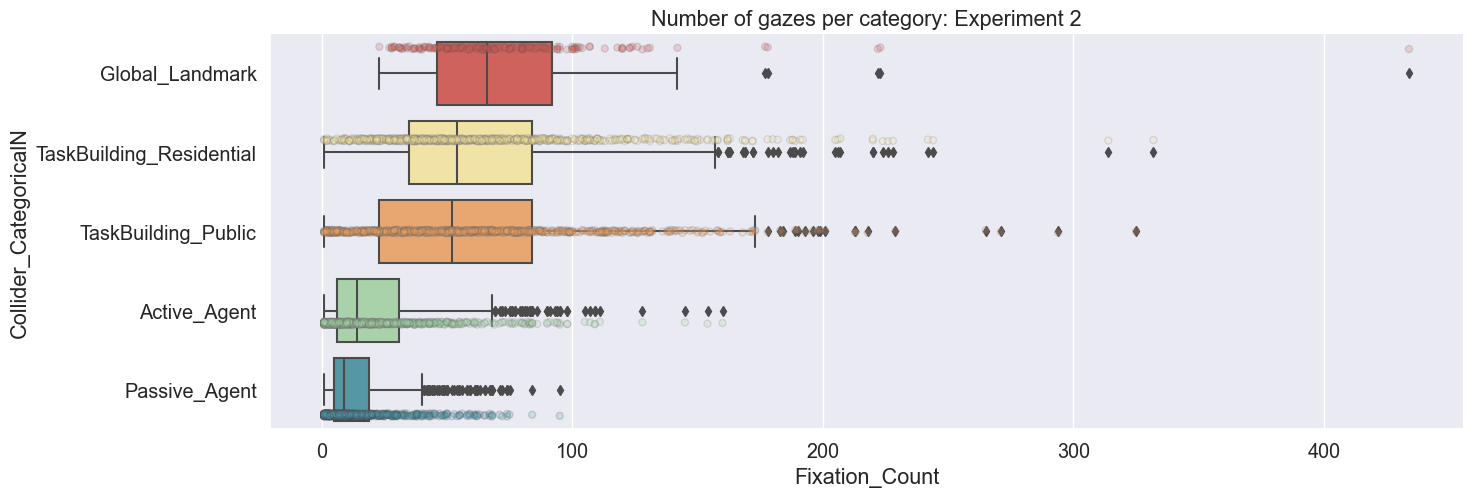

In [50]:
sns.catplot(y="Collider_CategoricalN", x="Fixation_Count", order= Fixation_count.index.values, data=Fixations, \
            height=5, aspect=3, kind='box', palette=my_categories).set(title="Number of gazes per category: Experiment 2")
ax = sns.stripplot(y="Collider_CategoricalN", x="Fixation_Count",  order= Fixation_count.index.values, data=Fixations, \
                   alpha=0.2, dodge=True,linewidth=1,edgecolor='gray', palette=my_categories)

/Users/tracysanchezpacheco/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tracysanchezpacheco/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


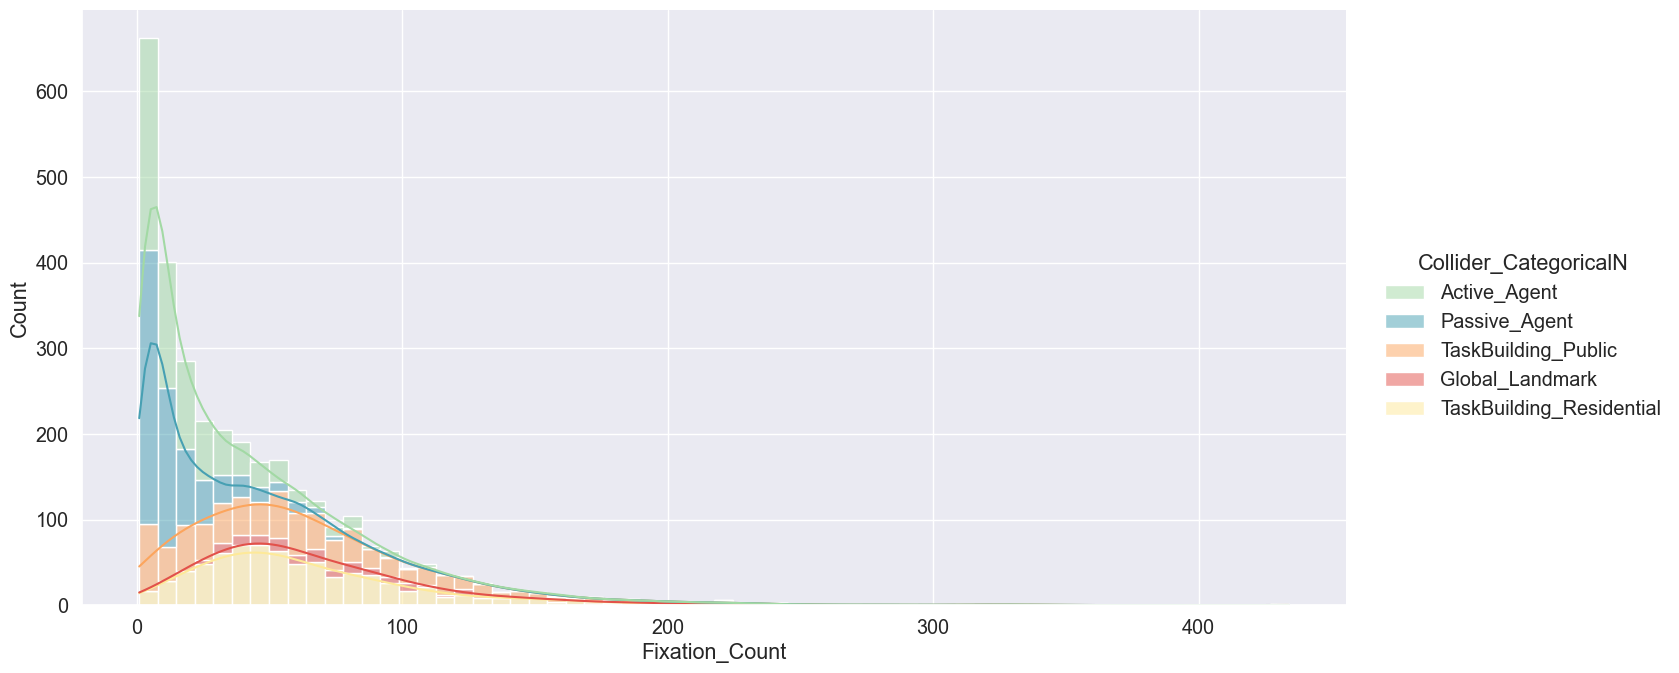

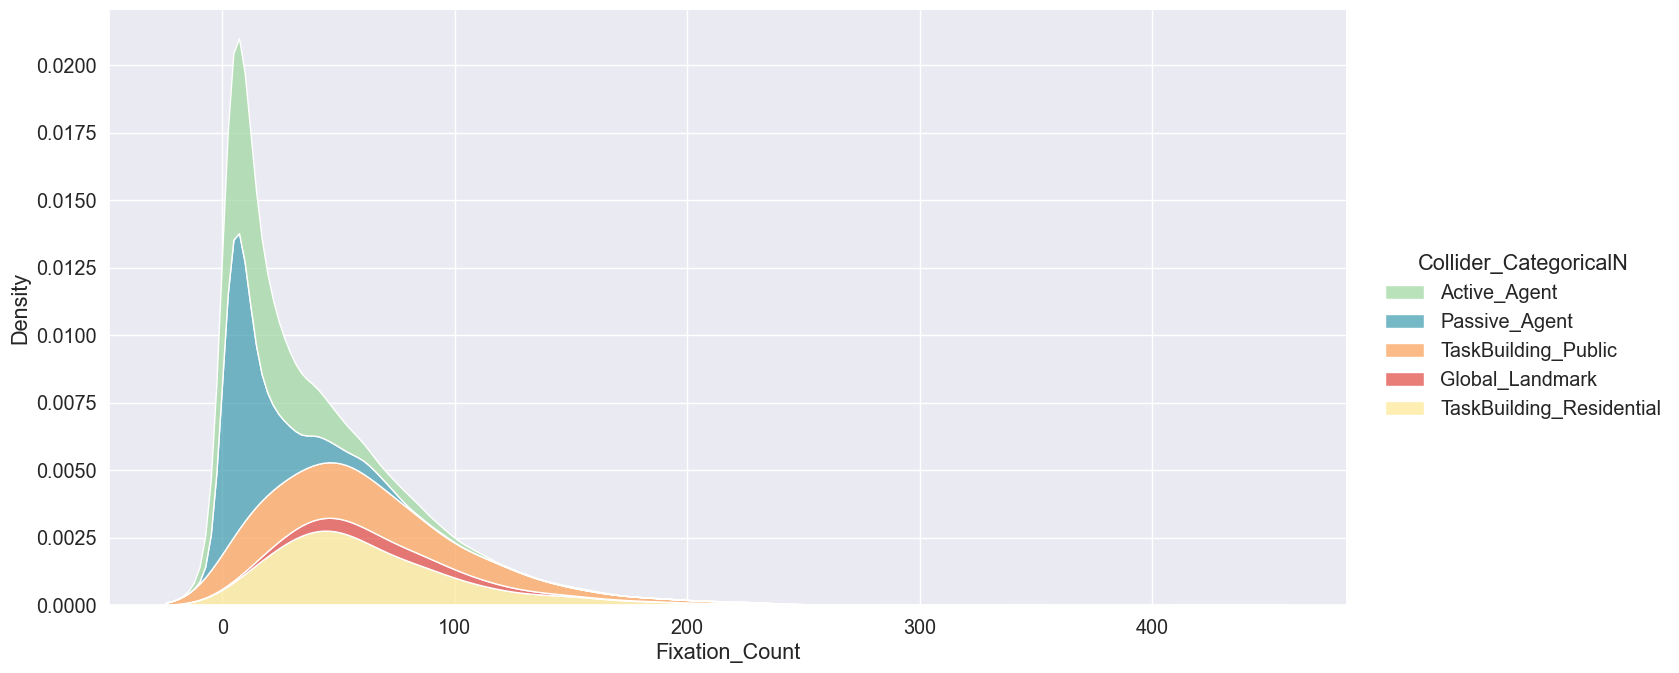

In [51]:
sns.displot(x='Fixation_Count', hue="Collider_CategoricalN",
             data=Fixations, 
            height=7, aspect= 2, kde=True, palette=my_categories, multiple="stack")

sns.displot(x='Fixation_Count', hue="Collider_CategoricalN",
             data=Fixations, 
            height=7, aspect= 2, kind="kde", palette=my_categories, multiple="stack")

In [52]:
Fixation_Dwelling_Time = pd.DataFrame(Fixations.groupby("Collider_CategoricalN")["Dwelling_Time"].mean().sort_values(ascending=False))
Fixation_Dwelling_Time

Dwelling_Time
Collider_CategoricalN                  
Global_Landmark                  15.045
TaskBuilding_Residential         12.483
TaskBuilding_Public              11.952
Active_Agent                      4.505
Passive_Agent                     3.042

/Users/tracysanchezpacheco/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/3p/lxg47mnx0ks_st66vkzkx1640000gn/T/ipykernel_14489/1356879902.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.stripplot(y="Collider_CategoricalN", x="Dwelling_Time",  order= Fixation_Dwelling_Time.index.values, data=Fixations, \


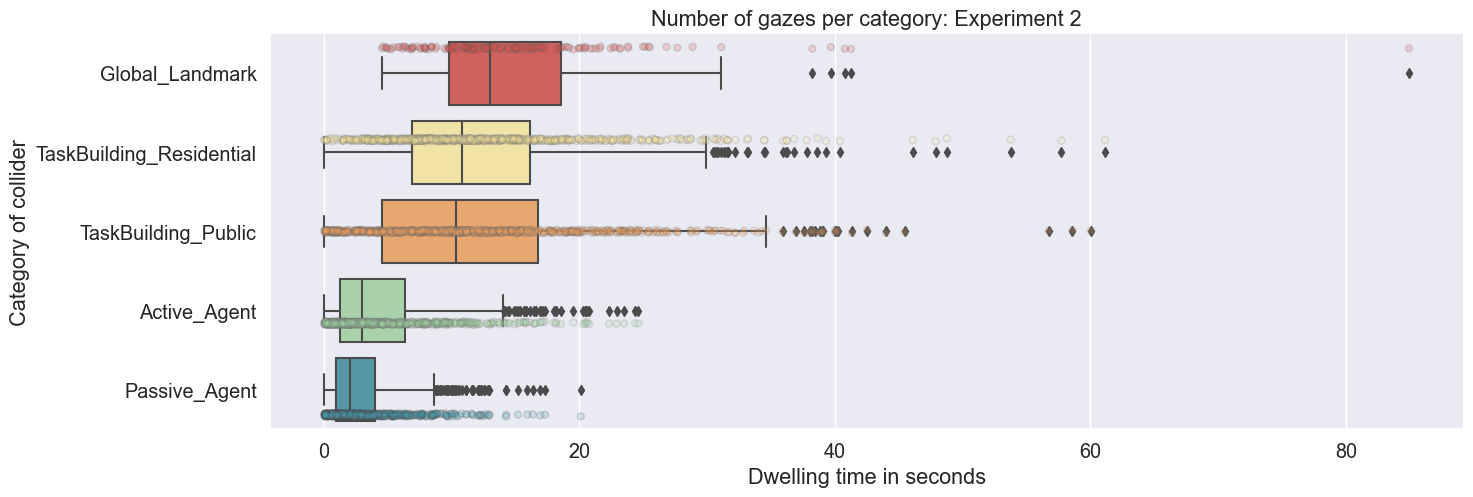

In [53]:
sns.catplot(y="Collider_CategoricalN", x="Dwelling_Time", order= Fixation_Dwelling_Time.index.values, data=Fixations, \
            height=5, aspect=3, kind='box', palette=my_categories)
ax = sns.stripplot(y="Collider_CategoricalN", x="Dwelling_Time",  order= Fixation_Dwelling_Time.index.values, data=Fixations, \
                   alpha=0.2, dodge=True,linewidth=1,edgecolor='gray', palette=my_categories).set(title="Number of gazes per category: Experiment 2", xlabel="Dwelling time in seconds", ylabel= "Category of collider")

/Users/tracysanchezpacheco/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tracysanchezpacheco/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


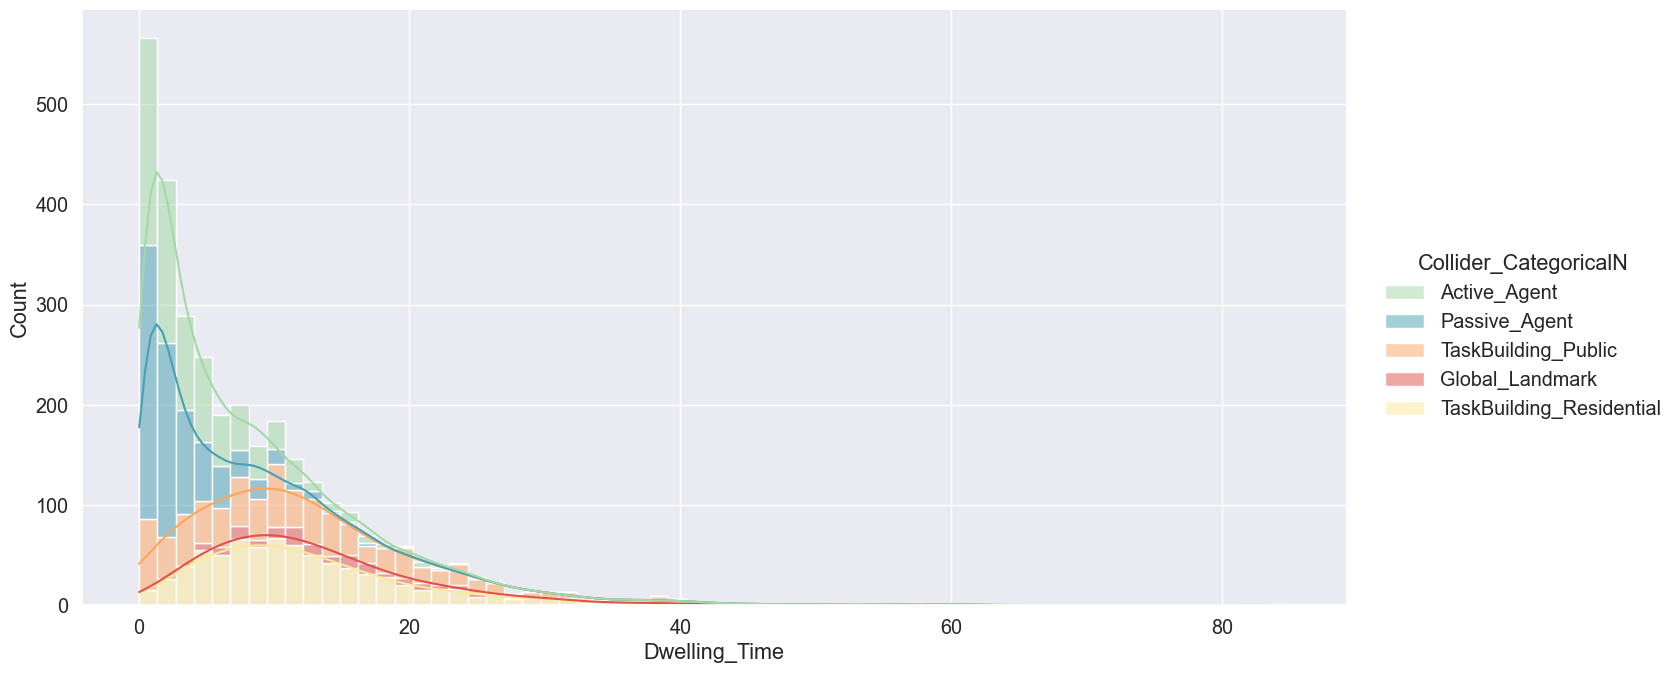

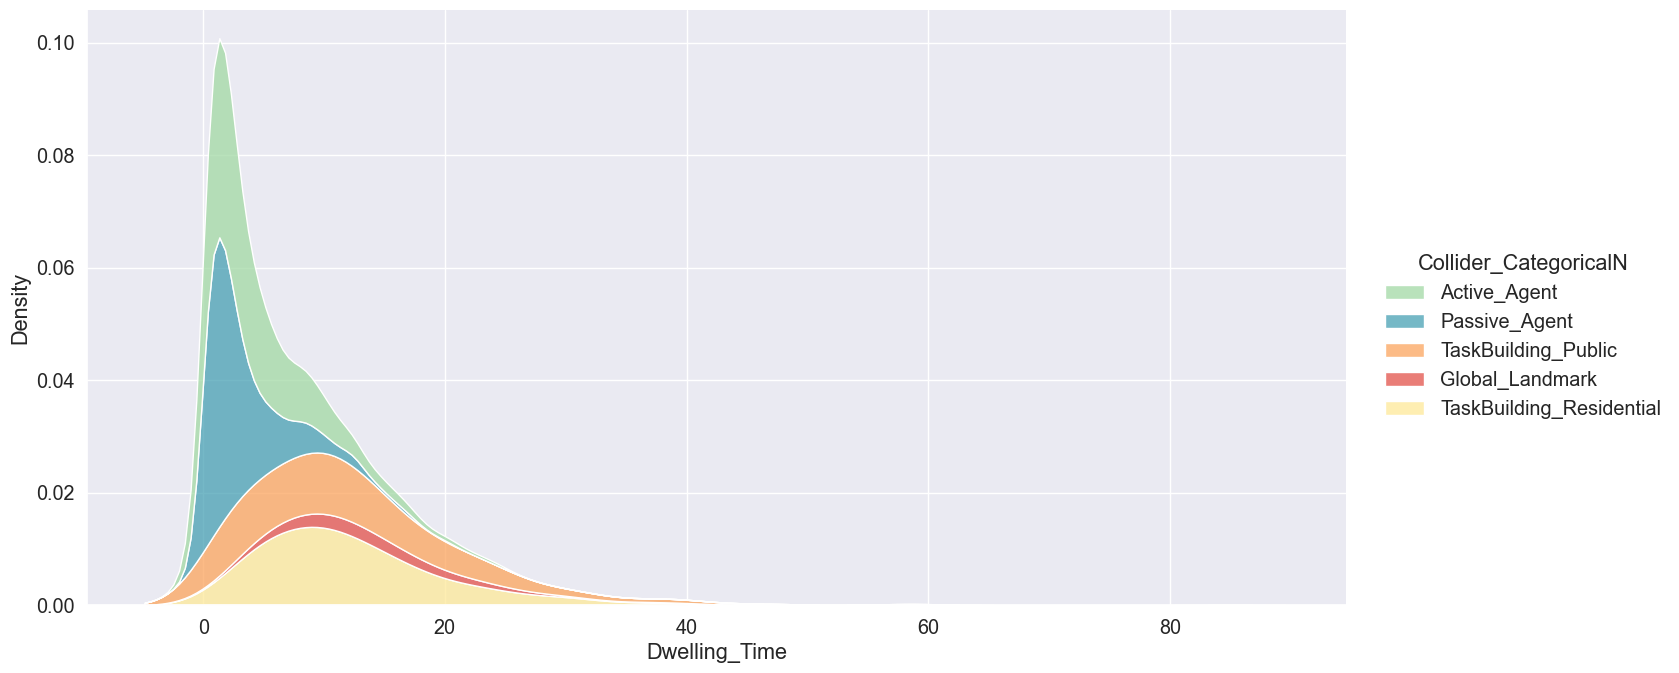

In [54]:
sns.displot(x='Dwelling_Time', hue="Collider_CategoricalN",
             data=Fixations, 
            height=7, aspect= 2, kde=True, palette=my_categories, multiple="stack")

sns.displot(x='Dwelling_Time', hue="Collider_CategoricalN",
             data=Fixations, 
            height=7, aspect= 2, kind="kde", palette=my_categories, multiple="stack")

<Axes: xlabel='Fixation_Count', ylabel='Dwelling_Time'>

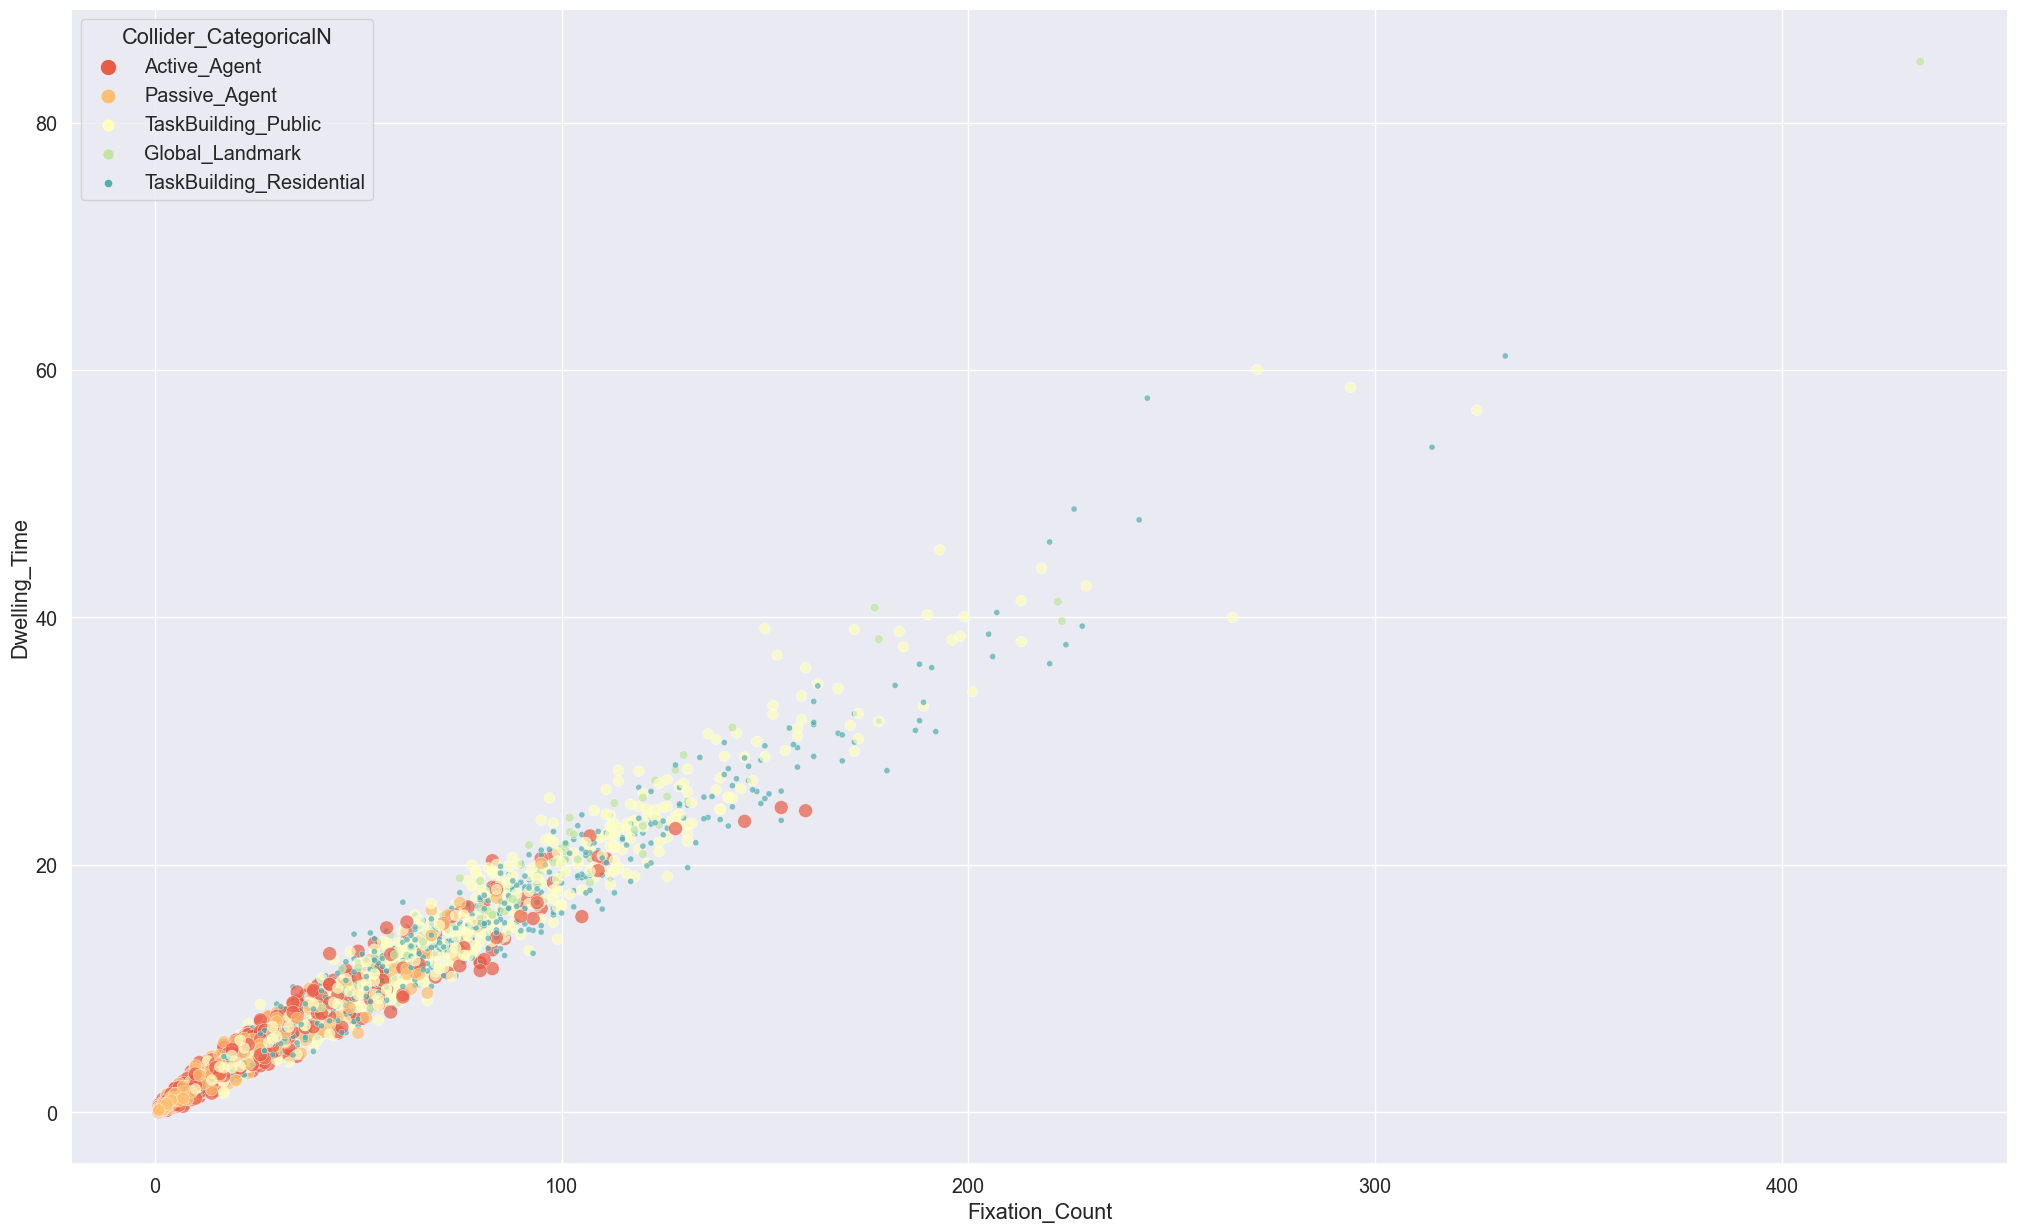

In [55]:
plt.figure(figsize=(25,15))
sns.set(font_scale = 1.3)
sns.scatterplot(x='Fixation_Count', y='Dwelling_Time', hue="Collider_CategoricalN",
                size="Collider_CategoricalN", sizes=(20,100), legend="full", data=Fixations, alpha=0.7, palette="Spectral")

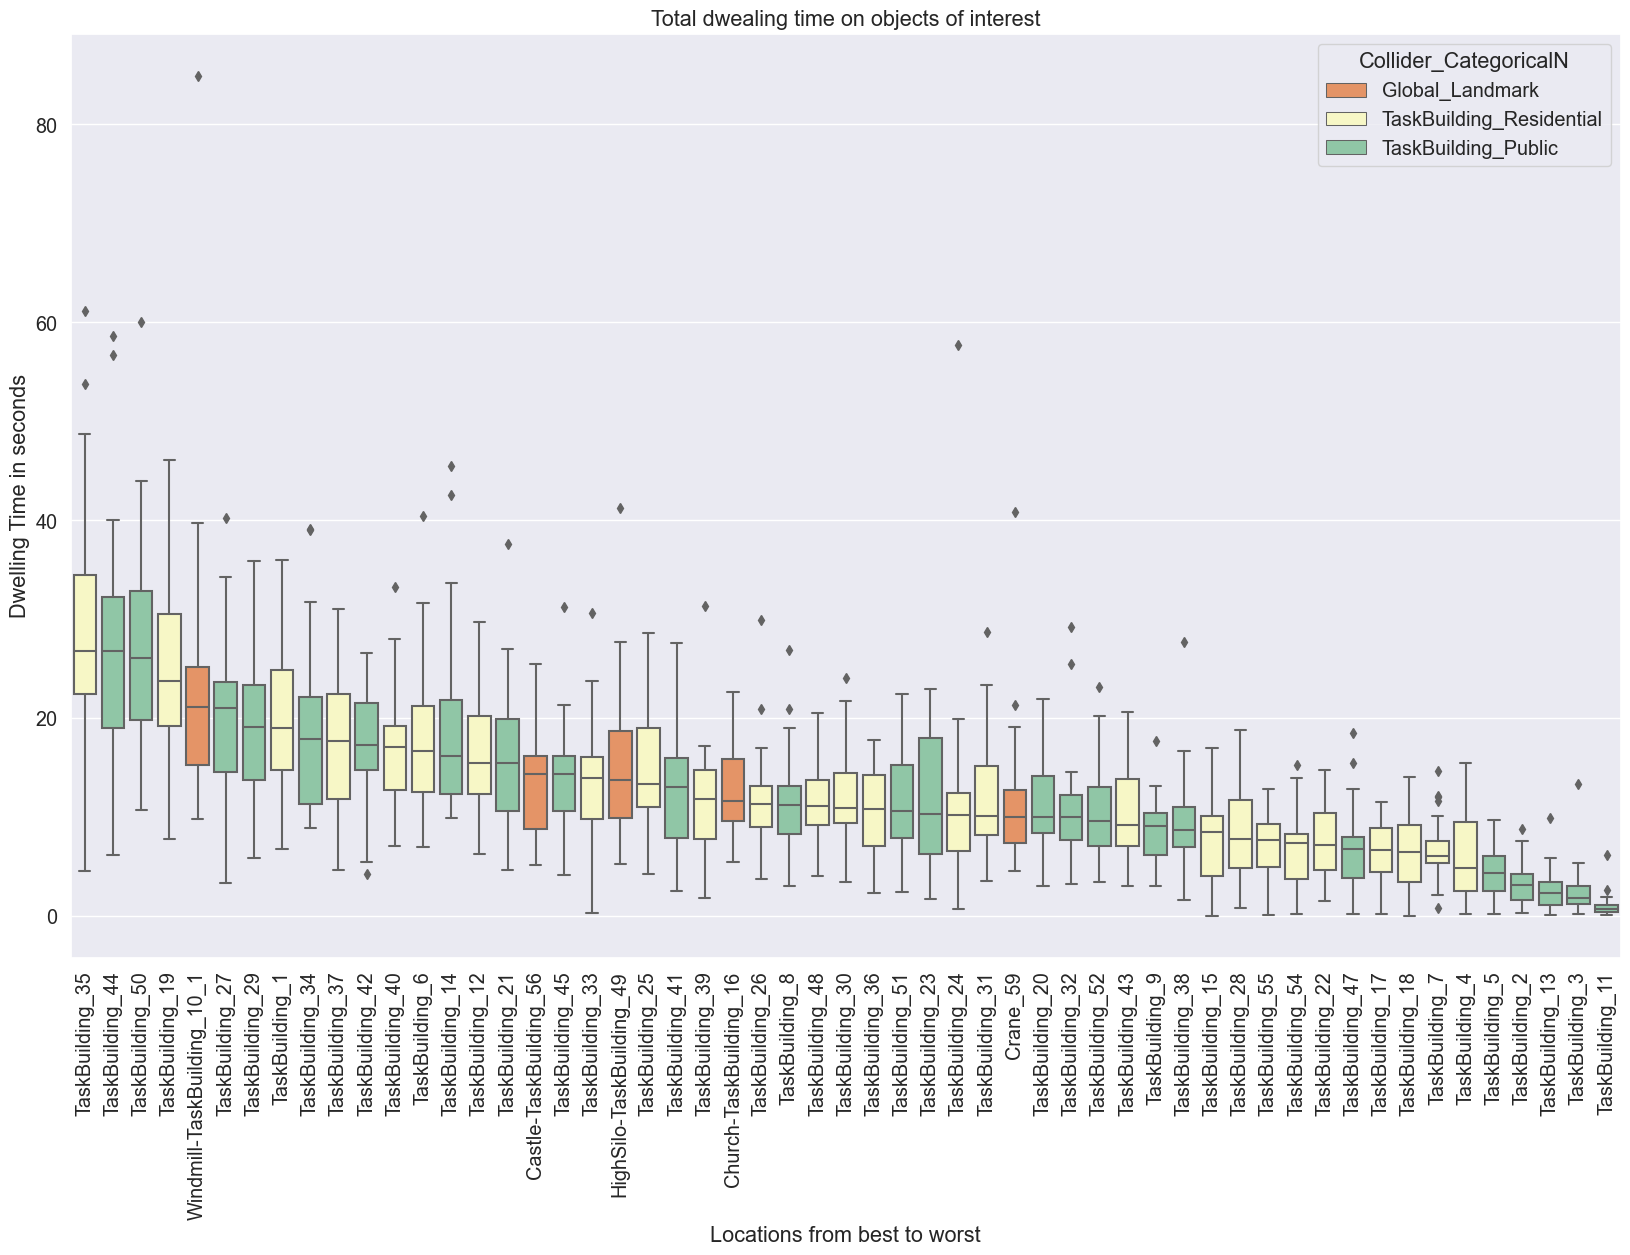

In [56]:
plt.figure(figsize=(20,12))
a = sns.boxplot(x='recoded', y='Dwelling_Time', dodge=False, hue="Collider_CategoricalN", order= order_buildings.index.values, data=TaskBuildings_GL, palette="Spectral")
plt.title('Total dwealing time on objects of interest')
plt.xlabel('Locations from best to worst')
plt.ylabel('Dwelling Time in seconds')
plt.xticks(rotation=90);

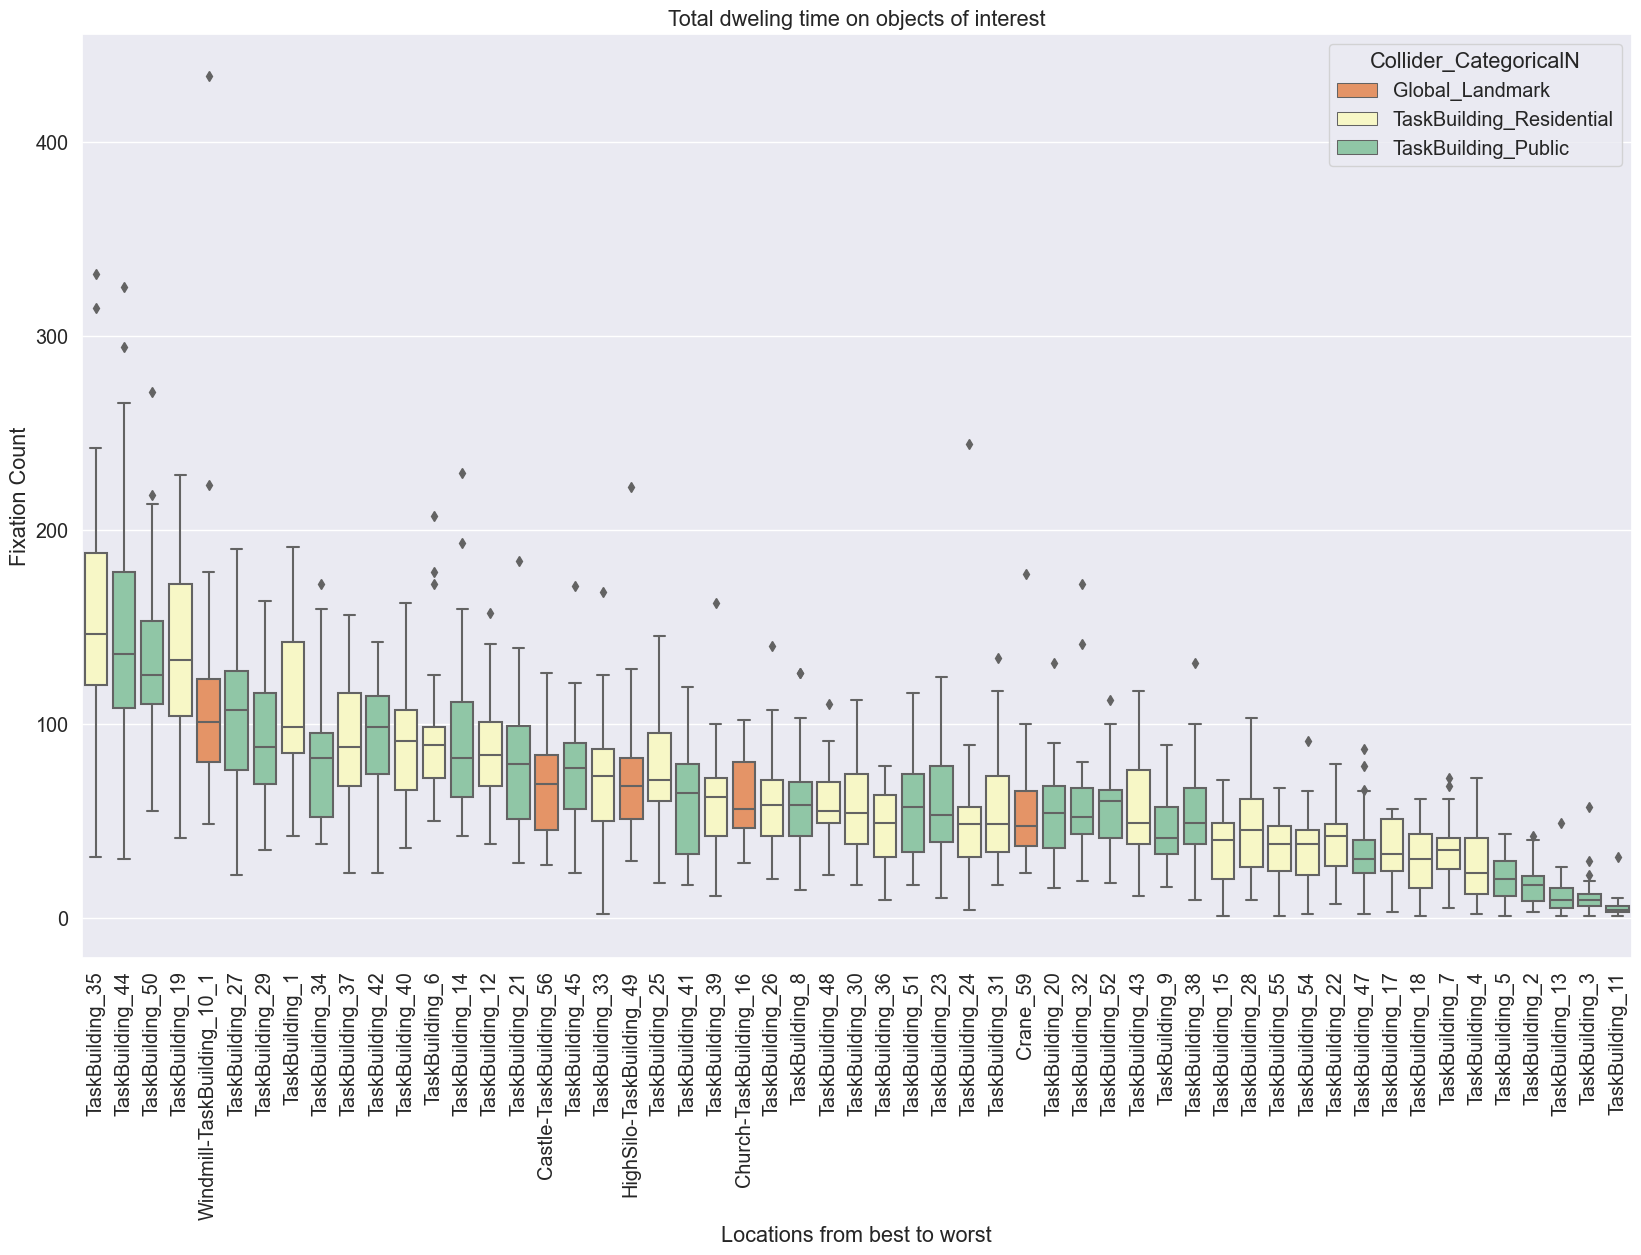

In [57]:
plt.figure(figsize=(20,12))
a = sns.boxplot(x='recoded', y='Fixation_Count', dodge=False, hue="Collider_CategoricalN", order= order_buildings.index.values, data=TaskBuildings_GL, palette="Spectral")
plt.title('Total dweling time on objects of interest')
plt.xlabel('Locations from best to worst')
plt.ylabel('Fixation Count')
plt.xticks(rotation=90);

In [58]:
my_categories_agent = {'Active_Agent': '#a2d9a4',
                'Passive_Agent': '#47a0b3'}

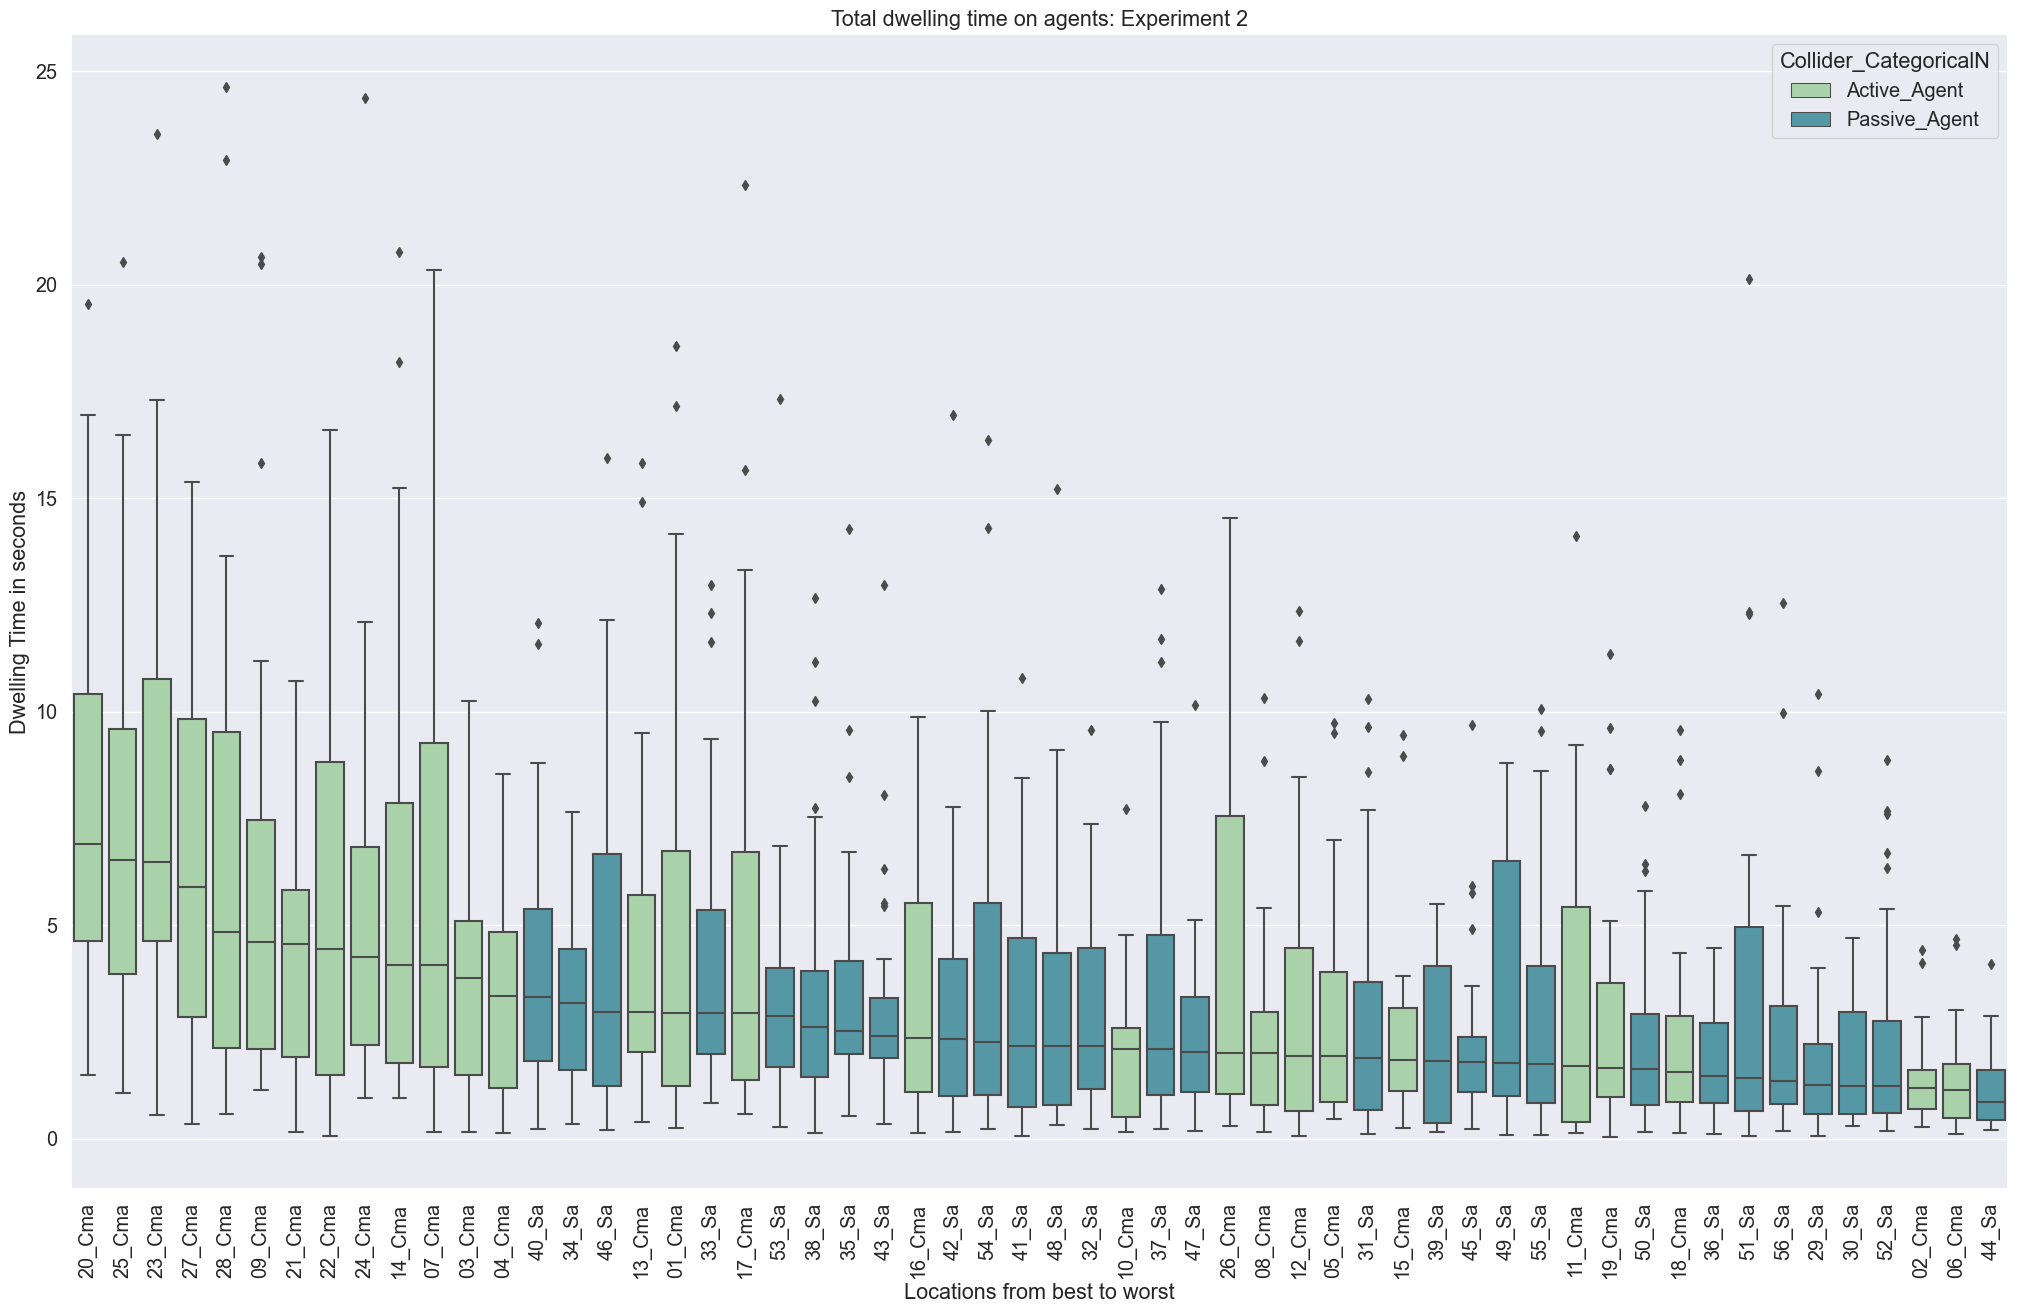

In [59]:
plt.figure(figsize=(25,15))
a = sns.boxplot(x='recoded', y='Dwelling_Time', dodge=False, hue="Collider_CategoricalN", order= order_agents.index.values, data=Agents, palette=my_categories_agent)
plt.title('Total dwelling time on agents: Experiment 2')
plt.xlabel('Locations from best to worst')
plt.ylabel('Dwelling Time in seconds')
plt.xticks(rotation=90);

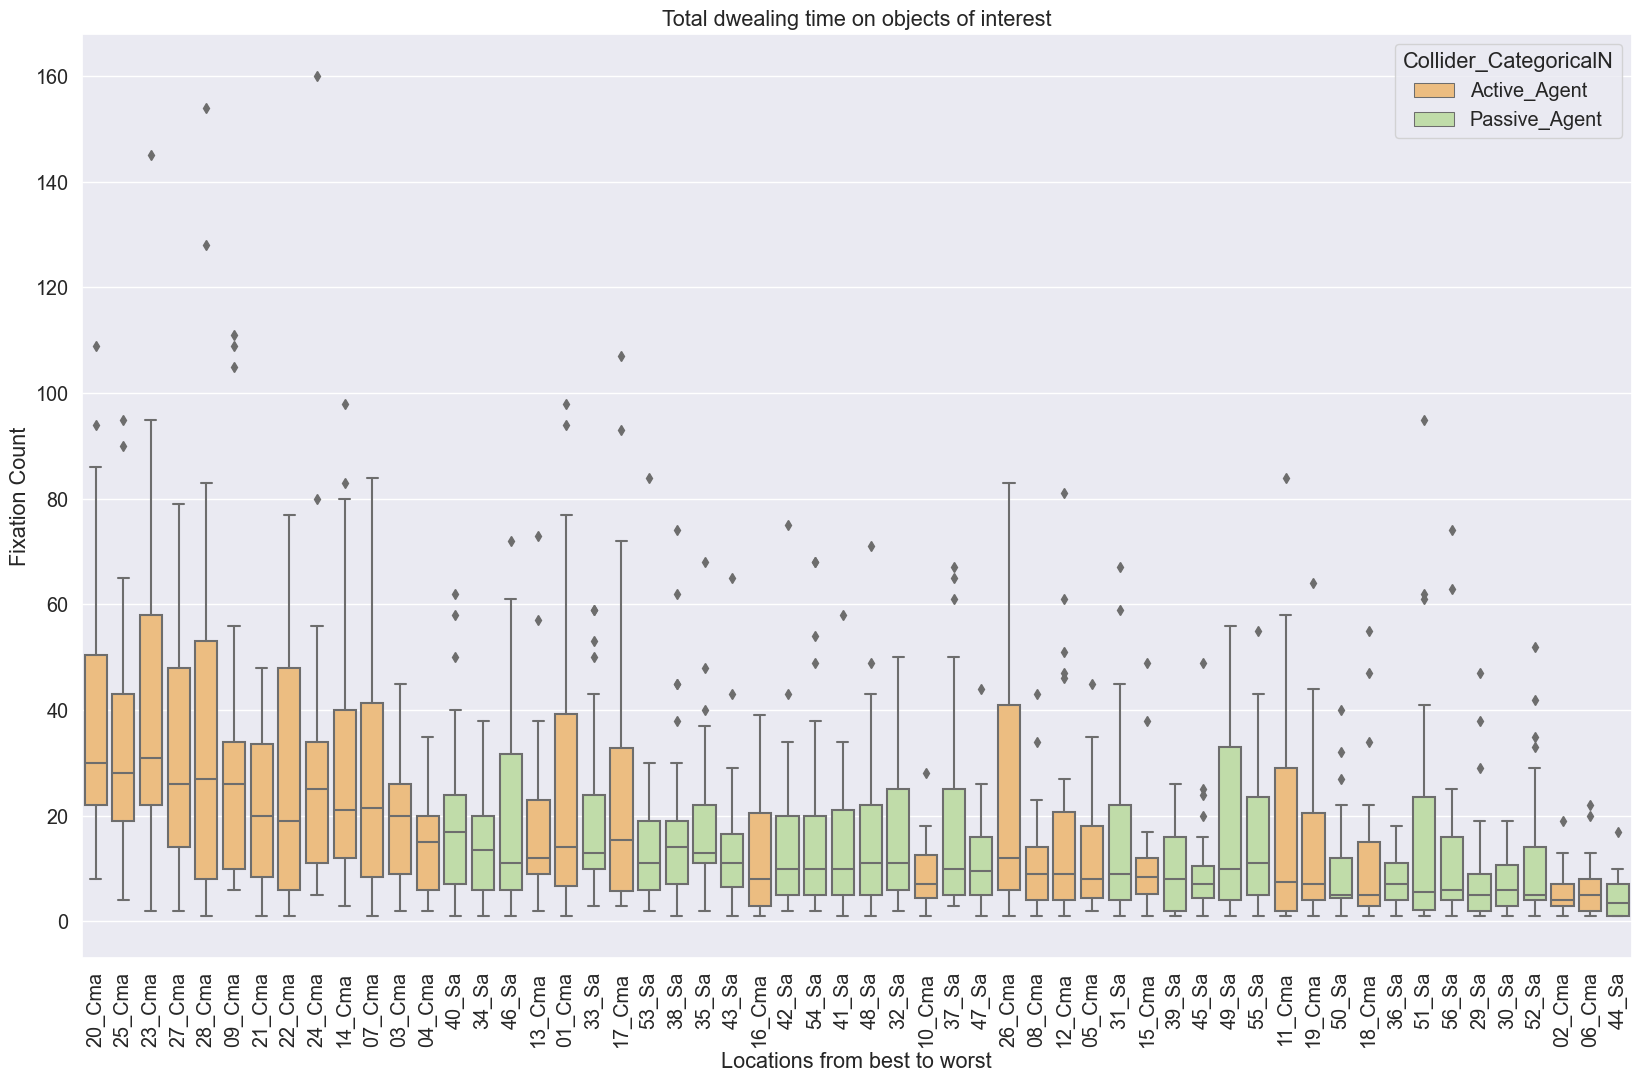

In [60]:
plt.figure(figsize=(20,12))
a = sns.boxplot(x='recoded', y='Fixation_Count', dodge=False, hue="Collider_CategoricalN", order= order_agents.index.values, data=Agents, palette="Spectral")
plt.title('Total dwealing time on objects of interest')
plt.xlabel('Locations from best to worst')
plt.ylabel('Fixation Count')
plt.xticks(rotation=90);

## Preparation for the merging of behavioral data with Dwelling times 

In [61]:
# Create a dictionary that identifies: Agent, Building, and graffity with one ID
patterns1 = {'^01_Cma$':1}
patterns1.update(dict.fromkeys(['^TaskBuilding_14$','^Graffity_14$'], 1))
patterns1.update(dict.fromkeys(['^02_Cma$','^TaskBuilding_41$','^Graffity_41$'], 2))
patterns1.update(dict.fromkeys(['^03_Cma$','^TaskBuilding_2$', '^Graffity_02$'], 3))
patterns1.update(dict.fromkeys(['^04_Cma$','^TaskBuilding_47$','^Graffity_47$'], 4))
patterns1.update(dict.fromkeys(['^05_Cma$','^Construction_57$'], 5))
patterns1.update(dict.fromkeys(['^06_Cma$','^TaskBuilding_20$','^Graffity_20$'], 6))
patterns1.update(dict.fromkeys(['^07_Cma$','^TaskBuilding_9$','^Graffity_09$'], 7))
patterns1.update(dict.fromkeys(['^08_Cma$','^TaskBuilding_50$','^Graffity_50$'], 8))
patterns1.update(dict.fromkeys(['^09_Cma$','^TaskBuilding_45$','^Graffity_45$'], 9))
patterns1.update(dict.fromkeys(['^10_Cma$','^TaskBuilding_8$','^Graffity_08$'], 10))
patterns1.update(dict.fromkeys(['^11_Cma$','^TaskBuilding_27$','^Graffity_27$'], 11))
patterns1.update(dict.fromkeys(['^12_Cma$','^TaskBuilding_51$','^Graffity_51$'], 12))
patterns1.update(dict.fromkeys(['^13_Cma$','^TaskBuilding_3$','^Graffity_03$'], 13))
patterns1.update(dict.fromkeys(['^14_Cma$','^TaskBuilding_11$','^Graffity_11$'], 14))
patterns1.update(dict.fromkeys(['^15_Cma$','^TaskBuilding_42$','^Graffity_42$'], 15))
patterns1.update(dict.fromkeys(['^16_Cma$','^TaskBuilding_23$','^Graffity_23$'], 16))
patterns1.update(dict.fromkeys(['^17_Cma$','^TaskBuilding_52$','^Graffity_52$'], 17))
patterns1.update(dict.fromkeys(['^18_Cma$','^TaskBuilding_38$','^Graffity_38$'], 18))
patterns1.update(dict.fromkeys(['^19_Cma$','^TaskBuilding_34$','^Graffity_34$'], 19))
patterns1.update(dict.fromkeys(['^20_Cma$','^BasketballCourt_58$'], 20))
patterns1.update(dict.fromkeys(['^21_Cma$','^TaskBuilding_5$','^Graffity_05$'], 21))
patterns1.update(dict.fromkeys(['^22_Cma$','^TaskBuilding_29$','^Graffity_29$'], 22))
patterns1.update(dict.fromkeys(['^23_Cma$','^TaskBuilding_32$','^Graffity_32$'], 23))
patterns1.update(dict.fromkeys(['^24_Cma$','^TaskBuilding_13$','^Graffity_13$'], 24))
patterns1.update(dict.fromkeys(['^25_Cma$','^TaskBuilding_44$','^Graffity_44$'], 25))
patterns1.update(dict.fromkeys(['^26_Cma$','^TaskBuilding_21$','^Graffity_21$'], 26))
patterns1.update(dict.fromkeys(['^27_Cma$','^Crane_59$', 'Castle-TaskBuilding_56'], 27))
patterns1.update(dict.fromkeys(['^28_Cma$','^Church-TaskBuilding_16'], 28))
patterns1.update(dict.fromkeys(['^29_Sa$','^TaskBuilding_4$','^Graffity_04$'], 29))
patterns1.update(dict.fromkeys(['^30_Sa$','^TaskBuilding_1$','^Graffity_01$'], 30))
patterns1.update(dict.fromkeys(['^31_Sa$','^TaskBuilding_6$','^Graffity_06$'], 31))
patterns1.update(dict.fromkeys(['^32_Sa$','^TaskBuilding_7$','^Graffity_07$'], 32))
patterns1.update(dict.fromkeys(['^33_Sa$','^TaskBuilding_17$','^Graffity_17$'], 33))
patterns1.update(dict.fromkeys(['^34_Sa$','^TaskBuilding_15$','^Graffity_15$'], 34))
patterns1.update(dict.fromkeys(['^35_Sa$','^TaskBuilding_12$','^Graffity_12$'], 35))
patterns1.update(dict.fromkeys(['^36_Sa$','^TaskBuilding_18$','^Graffity_18$'], 36))
patterns1.update(dict.fromkeys(['^37_Sa$','^TaskBuilding_19$','^Graffity_19$'], 37))
patterns1.update(dict.fromkeys(['^38_Sa$','^TaskBuilding_22$','^Graffity_22$'], 38))
patterns1.update(dict.fromkeys(['^39_Sa$','^TaskBuilding_24$','^Graffity_24$'], 39))
patterns1.update(dict.fromkeys(['^40_Sa','^TaskBuilding_25$','^Graffity_25$'], 40))
patterns1.update(dict.fromkeys(['^41_Sa','^TaskBuilding_26$','^Graffity_26$'], 41))
patterns1.update(dict.fromkeys(['^42_Sa','^TaskBuilding_28$','^Graffity_28$'], 42))
patterns1.update(dict.fromkeys(['^43_Sa','^TaskBuilding_30$','^Graffity_30$'], 43))
patterns1.update(dict.fromkeys(['^44_Sa','^TaskBuilding_31$','^Graffity_31$'], 44))
patterns1.update(dict.fromkeys(['^45_Sa','^TaskBuilding_33$','^Graffity_33$'], 45))
patterns1.update(dict.fromkeys(['^46_Sa','^TaskBuilding_35$','^Graffity_35$'], 46))
patterns1.update(dict.fromkeys(['^47_Sa','^TaskBuilding_36$','^Graffity_36$'], 47))
patterns1.update(dict.fromkeys(['^48_Sa','^TaskBuilding_37$','^Graffity_37$'], 48))
patterns1.update(dict.fromkeys(['^49_Sa','^TaskBuilding_39$','^Graffity_39$'], 49))
patterns1.update(dict.fromkeys(['^50_Sa','^TaskBuilding_40$','^Graffity_40$'], 50))
patterns1.update(dict.fromkeys(['^51_Sa','^TaskBuilding_43$','^Graffity_43$'], 51))
patterns1.update(dict.fromkeys(['^52_Sa','^TaskBuilding_48$','^Graffity_48$'], 52))
patterns1.update(dict.fromkeys(['^53_Sa','^TaskBuilding_54$','^Graffity_54$'], 53))
patterns1.update(dict.fromkeys(['^54_Sa','^TaskBuilding_55$','^Graffity_55$'], 54))
patterns1.update(dict.fromkeys(['^55_Sa','^Windmill-TaskBuilding_10_1'], 55))
patterns1.update(dict.fromkeys(['^56_Sa','^HighSilo-TaskBuilding_49'], 56))
default_val = np.nan

In [62]:
Fixations['avatar_ID'] = Fixations['recoded'].apply(lambda x: next((val for key, val in patterns1.items() if re.match(key, x)), default_val))    

In [63]:
Fixations['Category'] = np.where(Fixations.Collider_CategoricalN.str.contains("Agent"), "Agent_Gaze", "Building_Gaze")

In [64]:
Agent_Fixation = Fixations[Fixations.Category == "Agent_Gaze"]
Building_Fixation = Fixations[Fixations.Category == "Building_Gaze"]
Building_Fixation = Building_Fixation[Building_Fixation.recoded != 'Crane_59'].copy()

In [65]:
Fixations

SubjectID                     recoded     Collider_CategoricalN  \
0          1031                      01_Cma              Active_Agent   
1          1031                      02_Cma              Active_Agent   
2          1031                      03_Cma              Active_Agent   
3          1031                      04_Cma              Active_Agent   
4          1031                      05_Cma              Active_Agent   
...         ...                         ...                       ...   
3178       9627              TaskBuilding_6  TaskBuilding_Residential   
3179       9627              TaskBuilding_7  TaskBuilding_Residential   
3180       9627              TaskBuilding_8       TaskBuilding_Public   
3181       9627              TaskBuilding_9       TaskBuilding_Public   
3182       9627  Windmill-TaskBuilding_10_1           Global_Landmark   

      Dwelling_Time  Fixation_Count  avatar_ID       Category  
0             7.796              39          1     Agent_Gaze  
1             0.621               6          2     Agent_Gaze  
2             5.064              26          3     Agent_Gaze  
3             1.017               3          4     Agent_Gaze  
4             4.784              21          5     Agent_Gaze  
...             ...             ...        ...            ...  
3178          9.363              52         31  Building_Gaze  
3179          6.325              26         32  Building_Gaze  
3180         10.597              59         10  Building_Gaze  
3181          9.780              48          7  Building_Gaze  
3182         31.115             142         55  Building_Gaze  

[3183 rows x 7 columns]

In [66]:
Agent_wide_Fixations = Agent_Fixation.pivot(index=["SubjectID", 'avatar_ID'], columns='Category', values=["Dwelling_Time", "Fixation_Count"])
Building_wide_Fixations = Building_Fixation.pivot(index=["SubjectID", 'avatar_ID'], columns='Category', values=["Dwelling_Time", "Fixation_Count"])
Agent_wide_Fixations.reset_index(inplace=True)
Building_wide_Fixations.reset_index(inplace=True)

In [67]:
Agent_wide_Fixations.columns = ['_'.join(col) for col in Agent_wide_Fixations.columns]
Building_wide_Fixations.columns = ['_'.join(col) for col in Building_wide_Fixations.columns]
Agent_wide_Fixations

SubjectID_  avatar_ID_  Dwelling_Time_Agent_Gaze  \
0           1031           1                     7.796   
1           1031           2                     0.621   
2           1031           3                     5.064   
3           1031           4                     1.017   
4           1031           5                     4.784   
...          ...         ...                       ...   
1530        9627          52                     0.978   
1531        9627          53                     0.552   
1532        9627          54                     0.661   
1533        9627          55                     1.131   
1534        9627          56                     0.178   

      Fixation_Count_Agent_Gaze  
0                        39.000  
1                         6.000  
2                        26.000  
3                         3.000  
4                        21.000  
...                         ...  
1530                      4.000  
1531                      2.000  
1532                      3.000  
1533                      7.000  
1534                      1.000  

[1535 rows x 4 columns]

In [68]:
Agent_wide_Fixations.rename({"SubjectID_":"SubjectID", "avatar_ID_":"avatar_ID"}, inplace=True, axis=1)
Building_wide_Fixations.rename({"SubjectID_":"SubjectID", "avatar_ID_":"avatar_ID"}, inplace=True, axis=1)

In [69]:
wide_Fixations = Building_wide_Fixations.merge(Agent_wide_Fixations, on=["SubjectID", "avatar_ID"])
wide_Fixations.to_csv("/Volumes/TwoTeras/1_Experiment_2/Eye_Tracking/Pre_processed/Data_Sets/wide_Fixation.csv")

/Users/tracysanchezpacheco/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tracysanchezpacheco/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tracysanchezpacheco/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tracysanchezpacheco/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


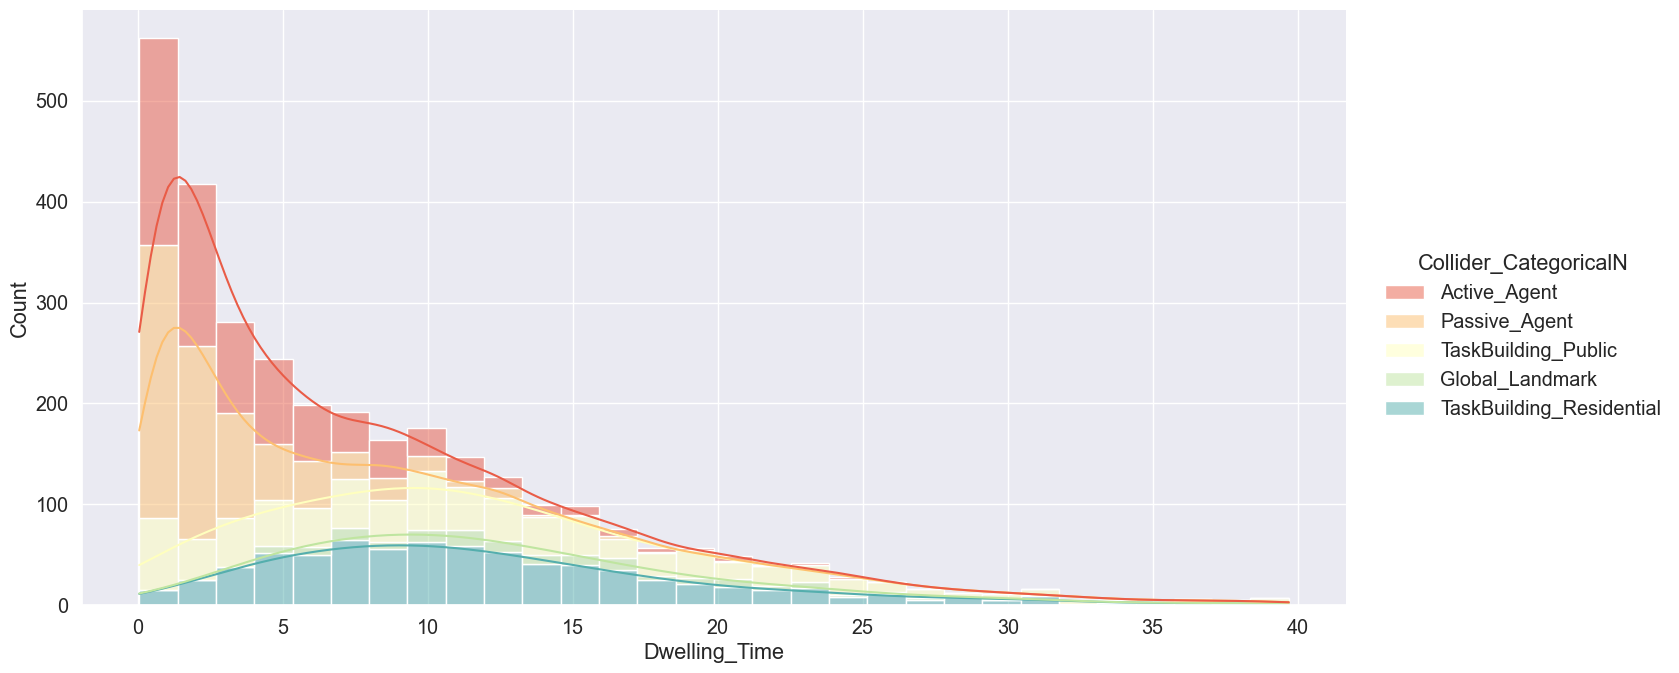

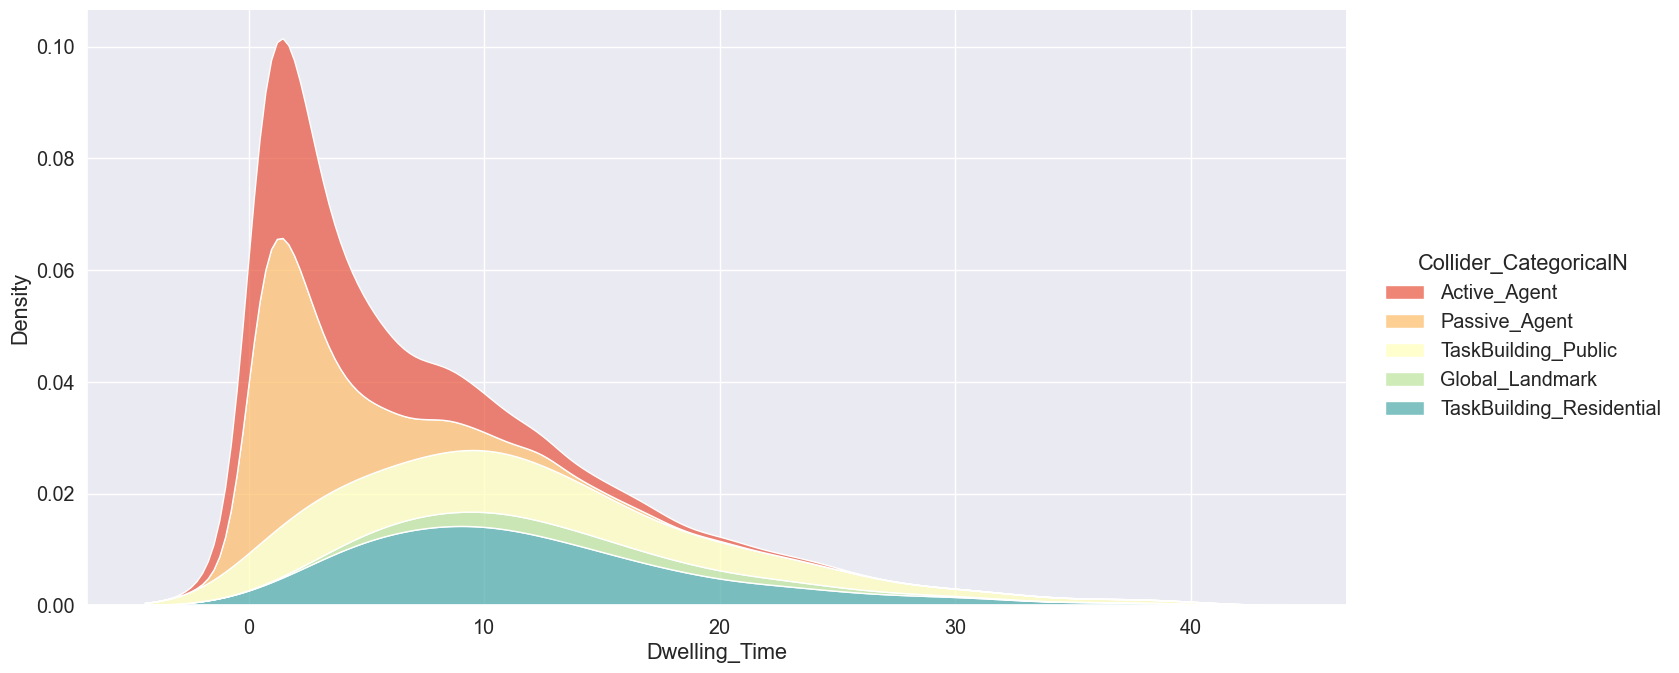

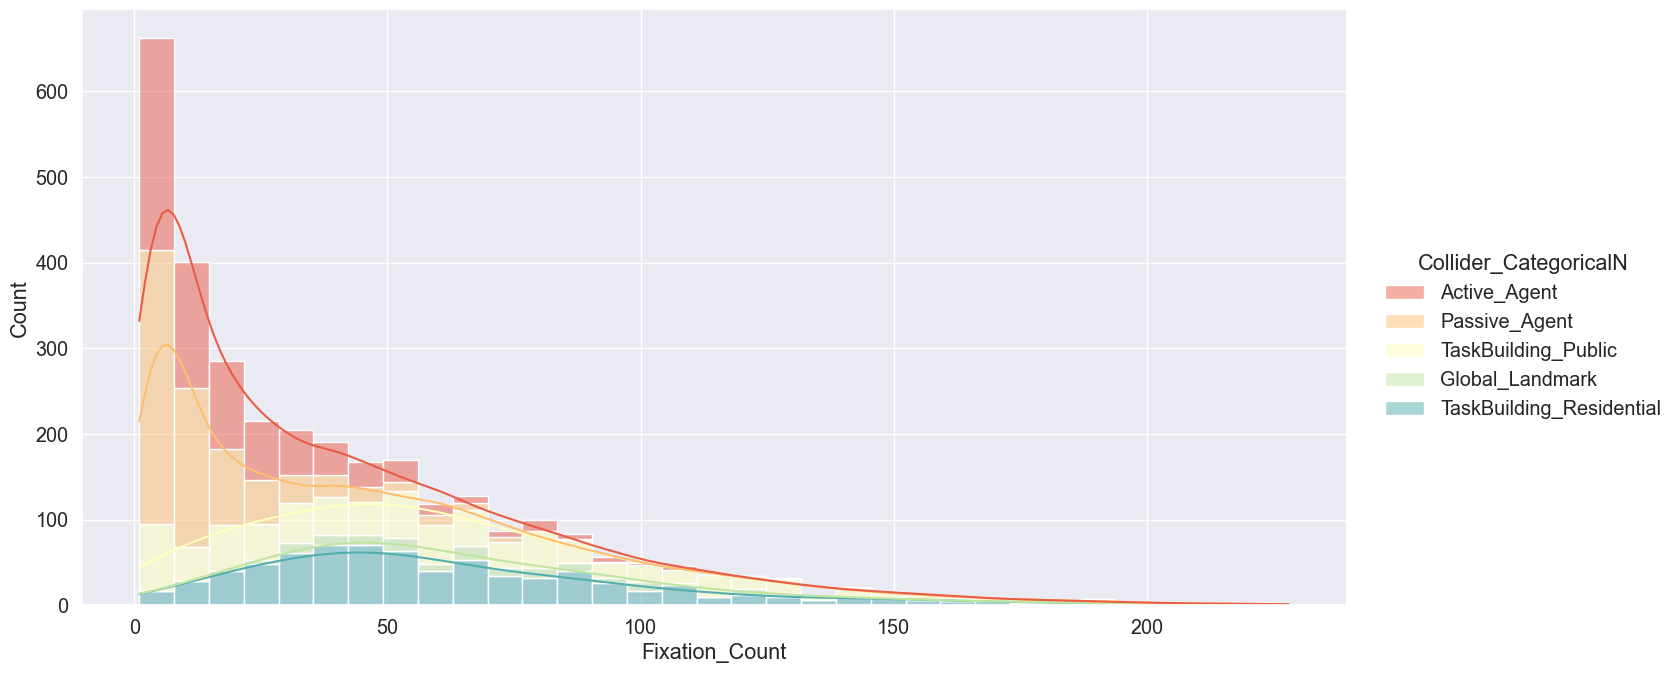

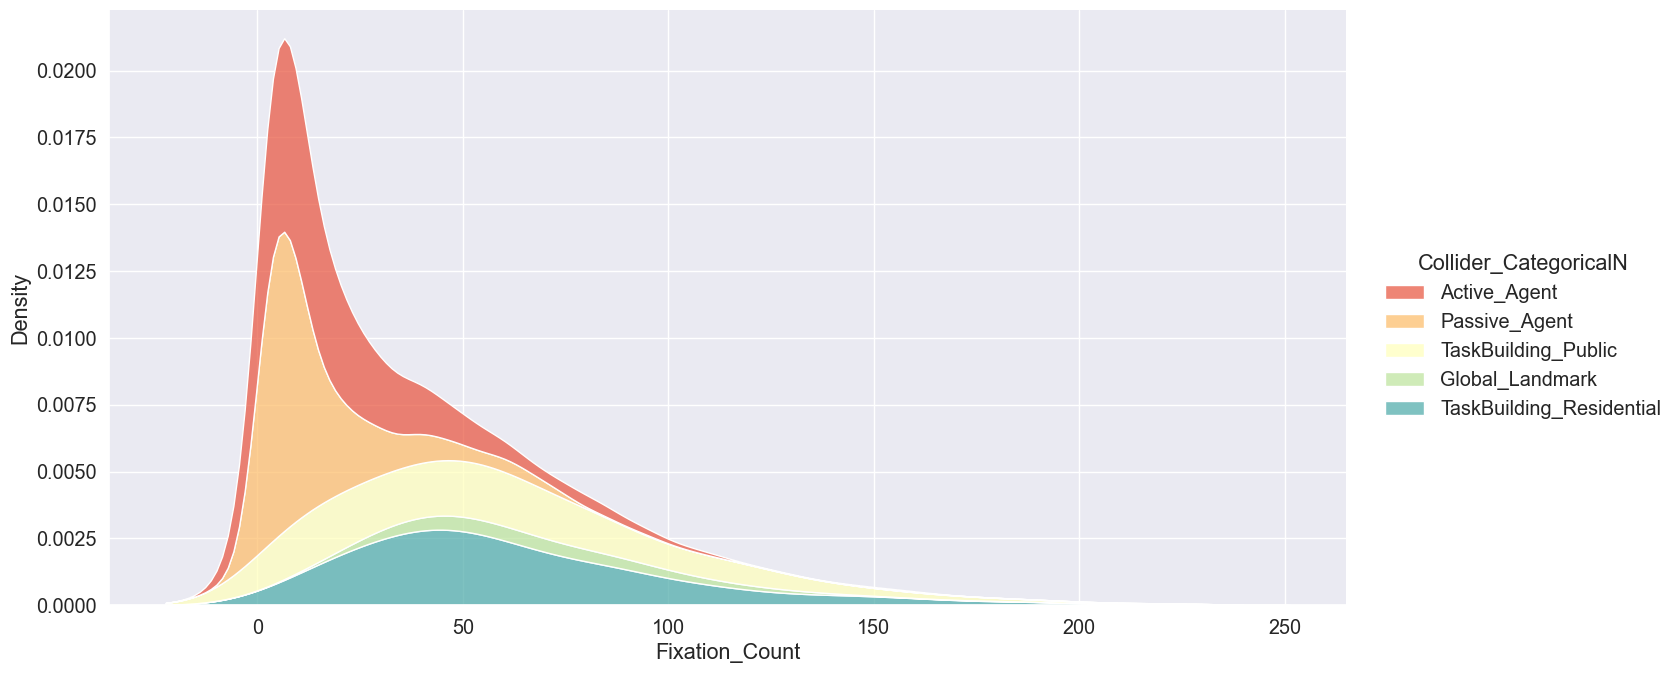

In [70]:
sns.displot(x='Dwelling_Time', hue="Collider_CategoricalN",
             data=Fixations[Fixations.Dwelling_Time < 40], 
            height=7, aspect= 2, kde=True, palette="Spectral",  multiple="stack")

sns.displot(x='Dwelling_Time', hue="Collider_CategoricalN",
             data=Fixations[Fixations.Dwelling_Time < 40], 
            height=7, aspect= 2, kind="kde", palette="Spectral",  multiple="stack")

sns.displot(x='Fixation_Count', hue="Collider_CategoricalN",
             data=Fixations[Fixations.Dwelling_Time < 40], 
            height=7, aspect= 2, kde=True, palette="Spectral",  multiple="stack")

sns.displot(x='Fixation_Count', hue="Collider_CategoricalN",
             data=Fixations[Fixations.Dwelling_Time < 40], 
            height=7, aspect= 2, kind="kde", palette="Spectral",  multiple="stack")

In [71]:
Behavioral = pd.read_csv("/Volumes/TwoTeras/1_Experiment_2/Pointing_Task/Results/BuildingPointingSummary_exp2.csv")
Agent_behavioral = pd.read_csv("/Volumes/TwoTeras/1_Experiment_2/Pointing_Task/Results/AgentPointingSummary.csv")

In [72]:
display(Behavioral.info())
display(Agent_behavioral.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6490 entries, 0 to 6489
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     6490 non-null   int64  
 1   ID                             6490 non-null   int64  
 2   AbsolutError                   6490 non-null   float64
 3   SignedAngle-+180               6490 non-null   float64
 4   IQR                            6490 non-null   float64
 5   RT                             6490 non-null   float64
 6   DistanceToParticipant          6490 non-null   float64
 7   PointingTaskStartingLocations  6490 non-null   int64  
 8   TrialNumber                    6490 non-null   int64  
 9   StartPointID                   6490 non-null   int64  
 10  ID_for_StartingPosition        6490 non-null   int64  
 11  avatarID                       6490 non-null   int64  
 12  AvatarPresenceCategory         6490 non-null   o

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4872 entries, 0 to 4871
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     4872 non-null   int64  
 1   ID                             4872 non-null   int64  
 2   AbsolutError                   4872 non-null   float64
 3   SignedAngle-+180               4872 non-null   float64
 4   IQR                            4872 non-null   float64
 5   RT                             4872 non-null   float64
 6   DistanceToParticipant          4872 non-null   float64
 7   PointingTaskStartingLocations  4872 non-null   int64  
 8   TrialNumber                    4872 non-null   int64  
 9   StartPointID                   4872 non-null   int64  
 10  ID_for_StartingPosition        4872 non-null   int64  
 11  avatarID                       4872 non-null   int64  
 12  AvatarPresenceCategory         4872 non-null   o

None

In [73]:
Agent_behavioral.columns = Agent_behavioral.columns.str.replace('_Agent','')
Agent_behavioral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4872 entries, 0 to 4871
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     4872 non-null   int64  
 1   ID                             4872 non-null   int64  
 2   AbsolutError                   4872 non-null   float64
 3   SignedAngle-+180               4872 non-null   float64
 4   IQR                            4872 non-null   float64
 5   RT                             4872 non-null   float64
 6   DistanceToParticipant          4872 non-null   float64
 7   PointingTaskStartingLocations  4872 non-null   int64  
 8   TrialNumber                    4872 non-null   int64  
 9   StartPointID                   4872 non-null   int64  
 10  ID_for_StartingPosition        4872 non-null   int64  
 11  avatarID                       4872 non-null   int64  
 12  AvatarPresenceCategory         4872 non-null   o

In [74]:
Behavioral.rename({"ID":"SubjectID", "avatarID":"avatar_ID"}, axis=1, inplace=True)
Agent_behavioral.rename({"ID":"SubjectID", "avatarID":"avatar_ID"}, axis=1, inplace=True)

In [75]:
Agent_behavioral.head()

Unnamed: 0  SubjectID  AbsolutError  SignedAngle-+180    IQR     RT  \
0           0       1031        73.240            73.240 44.370  9.057   
1           1       1031        18.559           -18.559 44.370 28.544   
2           2       1031        76.165           -76.165 44.370  5.412   
3           3       1031        32.789           -32.789 44.370  8.282   
4           4       1031        12.044            12.044 44.370  3.833   

   DistanceToParticipant  PointingTaskStartingLocations  TrialNumber  \
0                172.426                             15            1   
1                378.171                             23           67   
2                 61.859                             21          110   
3                133.833                              4          127   
4                321.285                             15            2   

   StartPointID  ID_for_StartingPosition  avatar_ID AvatarPresenceCategory  \
0             1                        1         16                Present   
1            12                        1         16                Present   
2            19                        2         16                Present   
3            22                        1         16                Present   
4             1                        2         50                Present   

   Context meaningfulBuilding AgentCategory       ImageName  
0    False     Not meaningful        Active  16_SaAct_92_36  
1    False     Not meaningful        Active  16_SaAct_92_36  
2    False     Not meaningful        Active  16_SaAct_92_36  
3    False     Not meaningful        Active  16_SaAct_92_36  
4    False     Not meaningful       Passive     50_Sa_66_15

In [76]:
BehavioralData_Fixations_Wide = Behavioral.merge(wide_Fixations, on=["SubjectID", "avatar_ID"], how="left")
AgentData_Fixations_Wide = Agent_behavioral.merge(wide_Fixations, on=["SubjectID", "avatar_ID"], how="left")
display(BehavioralData_Fixations_Wide.info())
display(AgentData_Fixations_Wide.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6490 entries, 0 to 6489
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     6490 non-null   int64  
 1   SubjectID                      6490 non-null   int64  
 2   AbsolutError                   6490 non-null   float64
 3   SignedAngle-+180               6490 non-null   float64
 4   IQR                            6490 non-null   float64
 5   RT                             6490 non-null   float64
 6   DistanceToParticipant          6490 non-null   float64
 7   PointingTaskStartingLocations  6490 non-null   int64  
 8   TrialNumber                    6490 non-null   int64  
 9   StartPointID                   6490 non-null   int64  
 10  ID_for_StartingPosition        6490 non-null   int64  
 11  avatar_ID                      6490 non-null   int64  
 12  AvatarPresenceCategory         6490 non-null   o

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4872 entries, 0 to 4871
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     4872 non-null   int64  
 1   SubjectID                      4872 non-null   int64  
 2   AbsolutError                   4872 non-null   float64
 3   SignedAngle-+180               4872 non-null   float64
 4   IQR                            4872 non-null   float64
 5   RT                             4872 non-null   float64
 6   DistanceToParticipant          4872 non-null   float64
 7   PointingTaskStartingLocations  4872 non-null   int64  
 8   TrialNumber                    4872 non-null   int64  
 9   StartPointID                   4872 non-null   int64  
 10  ID_for_StartingPosition        4872 non-null   int64  
 11  avatar_ID                      4872 non-null   int64  
 12  AvatarPresenceCategory         4872 non-null   o

None

BehavioralData_Fixations_Wide.head()

In [77]:
len(AgentData_Fixations_Wide.SubjectID.unique())

29

In [78]:
BehavioralData_Fixations_Wide["Agent_Category"] = np.where(BehavioralData_Fixations_Wide.avatar_ID > 28, "Passive", "Active")
AgentData_Fixations_Wide["Agent_Category"] = np.where(AgentData_Fixations_Wide.avatar_ID > 28, "Passive", "Active")

In [79]:
BehavioralData_Fixations_Wide.to_csv("/Volumes/TwoTeras/1_Experiment_2/Eye_Tracking/Pre_processed/Data_Sets/BehavioralData_Fixations_Wide.csv")
AgentData_Fixations_Wide.to_csv("/Volumes/TwoTeras/1_Experiment_2/Eye_Tracking/Pre_processed/Data_Sets/AgentData_Fixations_Wide.csv")

In [80]:
BehavioralData_Fixations_Wide[['Dwelling_Time_Agent_Gaze', 'Dwelling_Time_Building_Gaze',
       'Fixation_Count_Agent_Gaze', 'Fixation_Count_Building_Gaze',  'AbsolutError' ]].corr().style.background_gradient(cmap="viridis")

In [81]:
experiment_1 = pd.read_csv("/Volumes/TwoTeras/0_Experiment_1/Eye_Tracking/Pre_processed/Data_Sets/BehavioralData_Fixations_Wide.csv")

In [82]:
BehavioralData_Fixations_Wide = BehavioralData_Fixations_Wide.loc[:, ~BehavioralData_Fixations_Wide.columns.str.contains('^Unnamed')]
experiment_1 = experiment_1.loc[:, ~experiment_1.columns.str.contains('^Unnamed')]
experiment_1["Experiment"]= 1
BehavioralData_Fixations_Wide["Experiment"] = 2
experiment_1.rename({"meaningfulBuilding": "BuildingCategory"}, axis=1, inplace=True)

In [83]:
experiment_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10048 entries, 0 to 10047
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   SubjectID                      10048 non-null  int64  
 1   AbsolutError                   10048 non-null  float64
 2   SignedAngle-+180               10048 non-null  float64
 3   IQR                            10048 non-null  float64
 4   RT                             10048 non-null  float64
 5   DistanceToParticipant          10048 non-null  float64
 6   PointingTaskStartingLocations  10048 non-null  int64  
 7   TrialNumber                    10048 non-null  int64  
 8   StartPointID                   10048 non-null  int64  
 9   ID_for_StartingPosition        10048 non-null  int64  
 10  avatar_ID                      10048 non-null  int64  
 11  AvatarPresenceCategory         10048 non-null  object 
 12  Context                        10048 non-null 

In [84]:
BehavioralData_Fixations_Wide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6490 entries, 0 to 6489
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   SubjectID                      6490 non-null   int64  
 1   AbsolutError                   6490 non-null   float64
 2   SignedAngle-+180               6490 non-null   float64
 3   IQR                            6490 non-null   float64
 4   RT                             6490 non-null   float64
 5   DistanceToParticipant          6490 non-null   float64
 6   PointingTaskStartingLocations  6490 non-null   int64  
 7   TrialNumber                    6490 non-null   int64  
 8   StartPointID                   6490 non-null   int64  
 9   ID_for_StartingPosition        6490 non-null   int64  
 10  avatar_ID                      6490 non-null   int64  
 11  AvatarPresenceCategory         6490 non-null   object 
 12  Context                        6490 non-null   b

In [85]:
frames = [BehavioralData_Fixations_Wide, experiment_1]
result = pd.concat(frames)
result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16538 entries, 0 to 10047
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   SubjectID                      16538 non-null  int64  
 1   AbsolutError                   16538 non-null  float64
 2   SignedAngle-+180               16538 non-null  float64
 3   IQR                            16538 non-null  float64
 4   RT                             16538 non-null  float64
 5   DistanceToParticipant          16538 non-null  float64
 6   PointingTaskStartingLocations  16538 non-null  int64  
 7   TrialNumber                    16538 non-null  int64  
 8   StartPointID                   16538 non-null  int64  
 9   ID_for_StartingPosition        16538 non-null  int64  
 10  avatar_ID                      16538 non-null  int64  
 11  AvatarPresenceCategory         16538 non-null  object 
 12  Context                        16538 non-null  bool

In [86]:
result.pop("Agent_Action_level")

KeyError: 'Agent_Action_level'

In [ ]:
result.head()

In [ ]:
result.to_csv("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/BehavioralData_Fixations_Wide.csv")

In [ ]:
data_frame_gaze_no_out_ONLY_TEST.groupby([ "Hit_Object_Category", "Session"])["length"].agg(['median','count','mean','std','max', 'min'])

In [ ]:
summary_name_stats_fix_length_NS = pd.DataFrame(data_frame_gaze_no_out_ONLY_TEST.groupby([ "SubjectID",  "Hit_Object_Category", "Collider_CategoricalN","Session" ])["length"].agg(['count','mean','median','std','max', 'min']))

In [ ]:
data_frame_gaze_no_out_ONLY_TEST.columns

In [ ]:
summary_name_stats_fix_length_NS.reset_index(inplace=True)

In [ ]:
summary_name_stats_fix_length_NS

In [ ]:
summary_name_stats_fix_length_NS_Agent = summary_name_stats_fix_length_NS[summary_name_stats_fix_length_NS.Hit_Object_Category == 'Agent'].copy()
summary_name_stats_fix_length_NS_Agent['Agent_Category'] = summary_name_stats_fix_length_NS_Agent['Collider_CategoricalN'].str.contains('Active')
summary_name_stats_fix_length_NS_Agent.loc[:, 'Agent_Category'] = summary_name_stats_fix_length_NS_Agent['Agent_Category'].replace({True: 'Active', False: 'Passive'})

In [ ]:
summary_name_stats_fix_length_NS_Agent.to_csv("/Volumes/TwoTeras/0_Experiment_1/Eye_Tracking/Pre_processed/Data_Sets/summary_name_stats_fix_length_NS_Agent.csv")

In [ ]:
summary_name_stats_fix_length_NS_Agent

In [ ]:
summary_stats_fix_length = pd.DataFrame(data_frame_gaze_no_out.groupby(["Collider_CategoricalN", "SubjectID", "Session"])["length"].agg(['count','mean','median','std','max', 'min']))
summary_stats_fix_length.reset_index(inplace=True)
summary_name_stats_fix_length.shape

In [ ]:
summary_name_stats_fix_length_BIG= pd.DataFrame(data_frame_gaze_no_out_ONLY_TEST.groupby([ "SubjectID", "Hit_Object_Category", "Collider_CategoricalN","Session" ])["length"].agg(['count','mean','median','std','max', 'min']))

In [ ]:
summary_name_stats_fix_length_BIG.reset_index(inplace=True)
summary_name_stats_fix_length_BIG.head(20)

In [ ]:
summary_name_stats_fix_length_BIG.to_csv("/Volumes/TwoTeras/0_Experiment_1/Eye_Tracking/Pre_processed/Data_Sets/Grouped_Gazes.cvs")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("flare")
sns.catplot(x="Hit_Object_Category", y="median", hue="Session", data=summary_name_stats_fix_length_BIG[(summary_name_stats_fix_length_BIG.Hit_Object_Category == "Agent")], \
            height=5, aspect=3, kind='box').set(title="Median length of gazes per session")
ax = sns.stripplot(x="Hit_Object_Category", y="median", hue="Session", data=summary_name_stats_fix_length_BIG[summary_name_stats_fix_length_BIG.Hit_Object_Category == "Agent"], \
                   alpha=0.5, dodge=True,linewidth=1,edgecolor='gray')
ax.get_legend().remove()
plt.savefig('/Users/tracysanchezpacheco/Desktop/counts.png',  bbox_inches='tight')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(x="Hit_Object_Category", y="count", hue="Session", data=summary_name_stats_fix_length_BIG[(summary_name_stats_fix_length_BIG.Hit_Object_Category == "Agent")], \
            height=5, aspect=3, kind='box').set(title="Number of gazes per session")
ax = sns.stripplot(x="Hit_Object_Category", y="count", hue="Session", data=summary_name_stats_fix_length_BIG[summary_name_stats_fix_length_BIG.Hit_Object_Category == "Agent"], \
                   alpha=0.5, dodge=True,linewidth=1,edgecolor='gray')
ax.get_legend().remove()
plt.savefig('/Users/tracysanchezpacheco/Desktop/counts.png',  bbox_inches='tight')

In [ ]:
dy='Hit_Object_Category'; dx='count'; ort='h'; pal = sns.color_palette(); sigma = .2
f, ax = plt.subplots(figsize=(18, 15))

import ptitprince as pt

ax=pt.half_violinplot(x = dx, y = dy, data = summary_name_stats_fix_length_BIG, palette = pal, bw = .2, cut = 0.,
                      scale = 'area', width = .6, inner = None, orient = ort)
ax=sns.stripplot(x = dx, y = dy, data = summary_name_stats_fix_length_BIG, palette = pal, edgecolor = 'white',
                 size = 3, jitter = 1, zorder = 0, orient = ort)
ax=sns.boxplot(x = dx, y = dy, data = summary_name_stats_fix_length_BIG, color = 'black', width = .15, zorder = 10,\
            showcaps = True, boxprops = {'facecolor':'none', 'zorder':10},\
            showfliers=True, whiskerprops = {'linewidth':2, 'zorder':10},\
            saturation = 1, orient = ort) 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("flare")
sns.catplot(x="Collider_CategoricalN", y="count", hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN != "Background")], \
            height=5, aspect=3, kind='box').set(title="Number of gazes per session")
ax = sns.stripplot(x="Collider_CategoricalN", y="count",  hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN != "Background")], \
                   alpha=0.5, dodge=True,linewidth=1,edgecolor='gray')
ax.get_legend().remove()
plt.savefig('/Users/tracysanchezpacheco/Desktop/count.png')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("flare")
sns.catplot(x="Collider_CategoricalN", y="count", hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN == "Active_Agent")|(summary_stats_fix_length.Collider_CategoricalN == "Active_Agent_Face")|(summary_stats_fix_length.Collider_CategoricalN == "Passive_Agent")|(summary_stats_fix_length.Collider_CategoricalN == "Passive_Agent_Face")], \
            height=5, aspect=3, kind='box').set(title="Number of gazes per session")
ax = sns.stripplot(x="Collider_CategoricalN", y="count",  hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN == "Active_Agent")|(summary_stats_fix_length.Collider_CategoricalN == "Active_Agent_Face")|(summary_stats_fix_length.Collider_CategoricalN == "Passive_Agent")|(summary_stats_fix_length.Collider_CategoricalN == "Passive_Agent_Face")], \
                   alpha=0.5, dodge=True,linewidth=1,edgecolor='gray')
#plt.ylim(top=100)
ax.get_legend().remove()
plt.savefig('/Users/tracysanchezpacheco/Desktop/count_Faces.png',  bbox_inches='tight')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("flare")
sns.catplot(x="Collider_CategoricalN", y="median", hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN == "Active_Agent")|(summary_stats_fix_length.Collider_CategoricalN == "Active_Agent_Face")|(summary_stats_fix_length.Collider_CategoricalN == "Passive_Agent")|(summary_stats_fix_length.Collider_CategoricalN == "Passive_Agent_Face")], \
            height=6, aspect=3, kind='box').set(title="Median gaze duration per session")
ax = sns.stripplot(x="Collider_CategoricalN", y="median",  hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN == "Active_Agent")|(summary_stats_fix_length.Collider_CategoricalN == "Active_Agent_Face")|(summary_stats_fix_length.Collider_CategoricalN == "Passive_Agent")|(summary_stats_fix_length.Collider_CategoricalN == "Passive_Agent_Face")], \
                   alpha=0.5, dodge=True,linewidth=1,edgecolor='gray')
ax.get_legend().remove()
plt.savefig('/Users/tracysanchezpacheco/Desktop/Median_Duration_Faces.png',  bbox_inches='tight')

In [ ]:
data_frame_gaze_no_out_ONLY_TEST.tail()

In [ ]:
data_frame_gaze_no_out_ONLY_TEST.columns

In [ ]:
data_frame_gaze_no_out_ONLY_TEST.groupby(["SubjectID", "SessionSubsection"])['']

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("flare")
sns.catplot(x="Collider_CategoricalN", y="median", hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN != "Background")&(summary_stats_fix_length.Collider_CategoricalN != "Building")], \
            height=6, aspect=3, kind='box').set(title="Median gaze duration per session")
ax = sns.stripplot(x="Collider_CategoricalN", y="median",  hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN != "Background")&(summary_stats_fix_length.Collider_CategoricalN != "Building")], \
                   alpha=0.5, dodge=True,linewidth=1,edgecolor='gray')
ax.get_legend().remove()
plt.savefig('/Users/tracysanchezpacheco/Desktop/Median_Duration_All.png',  bbox_inches='tight')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("flare")
sns.catplot(x="Collider_CategoricalN", y="max", hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN == "Active_Agent")|(summary_stats_fix_length.Collider_CategoricalN == "Active_Agent_Face")|(summary_stats_fix_length.Collider_CategoricalN == "Passive_Agent")|(summary_stats_fix_length.Collider_CategoricalN == "Passive_Agent_Face")], \
            height=5, aspect=4, kind='box').set(title="Maximal duration of gaze duration per session")
ax = sns.stripplot(x="Collider_CategoricalN", y="max",  hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN == "Active_Agent")|(summary_stats_fix_length.Collider_CategoricalN == "Active_Agent_Face")|(summary_stats_fix_length.Collider_CategoricalN == "Passive_Agent")|(summary_stats_fix_length.Collider_CategoricalN == "Passive_Agent_Face")], \
                   alpha=0.5, dodge=True,linewidth=1,edgecolor='gray')
ax.get_legend().remove()
plt.savefig('/Users/tracysanchezpacheco/Desktop/MedianDurationFaces.png')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("flare")
sns.catplot(x="Collider_CategoricalN", y="std", hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN != "Background")&(summary_stats_fix_length.Collider_CategoricalN != "Building")], \
            height=5, aspect=4, kind='box').set(title="Standard Deviation of gaze duration per session")
ax = sns.stripplot(x="Collider_CategoricalN", y="std",  hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN != "Background")&(summary_stats_fix_length.Collider_CategoricalN != "Building")], \
                   alpha=0.5, dodge=True,linewidth=1,edgecolor='gray')
ax.get_legend().remove()
ax.set_ylabel("Standard Deviation of gaze duration")
plt.savefig('/Users/tracysanchezpacheco/Desktop/MedianDurationFaces.png', bbox_inches='tight')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("flare")
sns.catplot(x="Collider_CategoricalN", y="min", hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN != "Background")&(summary_stats_fix_length.Collider_CategoricalN != "Building")], \
            height=7, aspect=4, kind='box').set(title="Minimum duration duration of gazes per session")
ax = sns.stripplot(x="Collider_CategoricalN", y="min",  hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN != "Background")&(summary_stats_fix_length.Collider_CategoricalN != "Building")], \
                   alpha=0.5, dodge=True,linewidth=1,edgecolor='gray')
#plt.ylim(top=1)
ax.get_legend().remove()
ax.set_ylabel("Minimum duration of gazes per session")
plt.savefig('/Users/tracysanchezpacheco/Desktop/count.png', bbox_inches='tight')

In [ ]:
HumanA = pd.read_csv("/Users/tracysanchezpacheco/Documents/Resources/humanA_Behavioural.csv")

In [ ]:
HumanA["AE_Median_Standard_Duration"] = np.nanmedian(abs(HumanA.AbsolutError - np.nanmedian(HumanA.AbsolutError))) * 1.4826
HumanA["AE_mad_z"] = abs(HumanA.AbsolutError.tolist() - np.nanmedian(HumanA.AbsolutError)) / HumanA.AE_Median_Standard_Duration.tolist()
HumanA["Outlier_AE_Length"] = np.where(HumanA["AE_mad_z"] > 3.5, "Out", "Stays")
HumanA["RT_Median_Standard_Duration"] = np.nanmedian(abs(HumanA.RT - np.nanmedian(HumanA.RT))) * 1.4826
HumanA["RT_mad_z"] = abs(HumanA.RT.tolist() - np.nanmedian(HumanA.RT)) / HumanA.RT_Median_Standard_Duration.tolist()
HumanA["Outlier_RT_Length"] = np.where(HumanA["RT_mad_z"] > 3.5, "Out", "Stays")
HumanA_OUT = HumanA[(HumanA.Outlier_AE_Length != "Out") & (HumanA.Outlier_RT_Length != "Out")]
HumanA_OUT.to_csv("/Volumes/TwoTeras/0_Experiment_1/Eye_Tracking/Pre_processed/Data_Sets/HumanA_NoOut.cvs")

In [ ]:
data_frame.head(50)

In [ ]:
data_frame.info()

In [ ]:
data_frame.to_csv("/Volumes/SSD/00_Data_Processing/Pre_processed/Complete_Data_AngularV.cvs")

In [ ]:
One_participant.columns

In [ ]:
One_participant.drop(columns=['Unnamed: 0', 'level_0','Unnamed: 0.1', 'Unnamed: 0.1.1'], inplace=True)

In [ ]:
One_participant.events.value_counts()

In [ ]:
One_participant['avg_shift'] = One_participant['avg_dist'].shift(1) != One_participant['avg_dist']

In [ ]:
data_frame.iloc[115318:115322,6:9]

In [ ]:
data_frame.info()

In [ ]:
One_participant.iloc[115521:115532,45:50]

In [ ]:
One_participant.iloc[115318:115322,6]

In [ ]:
One_participant.iloc[115322,6] - One_participant.iloc[115318,6]

In [ ]:
One_participant.iloc[115532,6] - One_participant.iloc[115521,6]

In [ ]:
One_participant.tail(200)

In [ ]:
pd.set_option('display.max_rows', 500)

In [ ]:
df